## COP and COG estimation by derivative method
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the next function:
COP= COG-(4/g*3*d²derivadasegundaTeta)

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [1]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
#                rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [2]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Wed Apr 06 23:36:34 2022 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [3]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


In [4]:
a=PDSinfo[PDSinfo['Subject']==44].index.tolist()
e=PDSinfo[PDSinfo['Subject']==44].index.tolist()[2]
print(a)
print(e)

[516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527]
518


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

## For Every Subject

## Corrrelation 

In [5]:

import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)

# Correlation between errorx and Second Derivative x

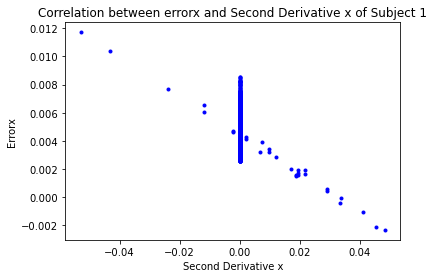

[[ 1.         -0.09580624]
 [-0.09580624  1.        ]]
          x         y
x  1.000000 -0.267268
y -0.267268  1.000000


<Figure size 432x288 with 0 Axes>

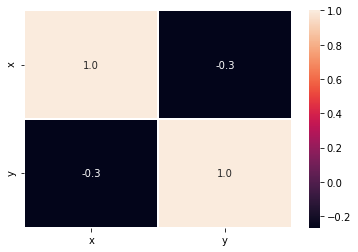

          x         y
x  1.000000 -0.100389
y -0.100389  1.000000


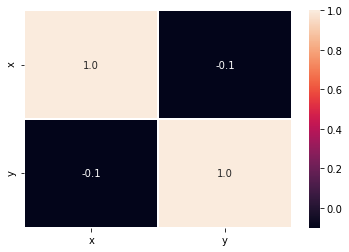

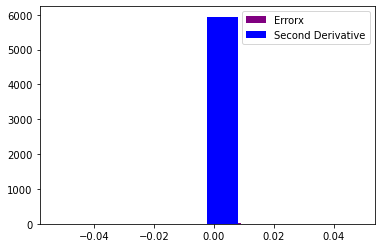

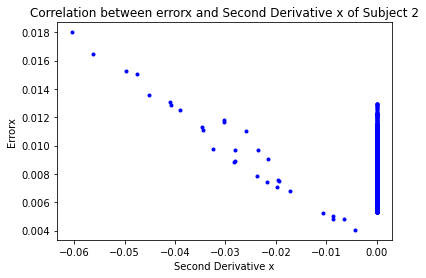

[[ 1.         -0.22668354]
 [-0.22668354  1.        ]]
          x         y
x  1.000000 -0.145178
y -0.145178  1.000000


<Figure size 432x288 with 0 Axes>

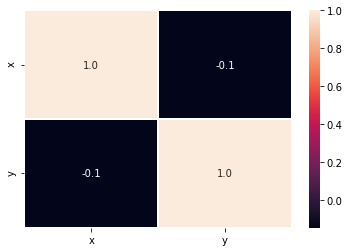

          x         y
x  1.000000 -0.018738
y -0.018738  1.000000


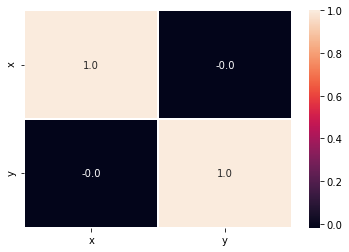

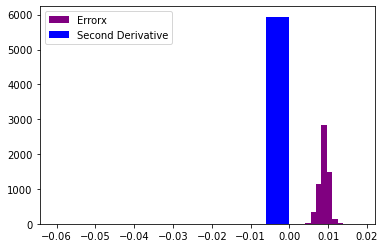

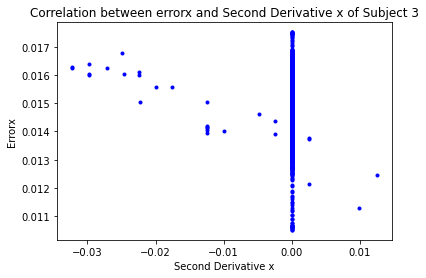

[[ 1.         -0.16194931]
 [-0.16194931  1.        ]]
          x         y
x  1.000000 -0.081171
y -0.081171  1.000000


<Figure size 432x288 with 0 Axes>

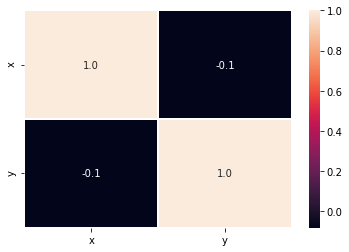

          x         y
x  1.000000 -0.054625
y -0.054625  1.000000


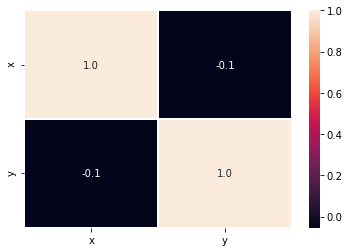

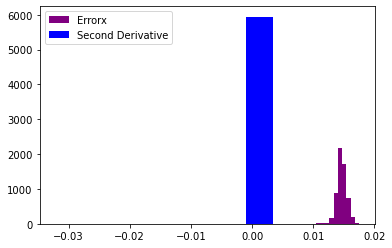

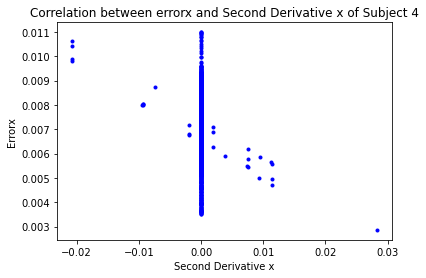

[[ 1.         -0.02182057]
 [-0.02182057  1.        ]]
         x        y
x  1.00000 -0.13939
y -0.13939  1.00000


<Figure size 432x288 with 0 Axes>

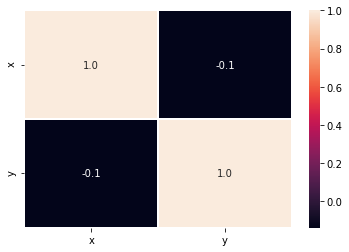

          x         y
x  1.000000 -0.076132
y -0.076132  1.000000


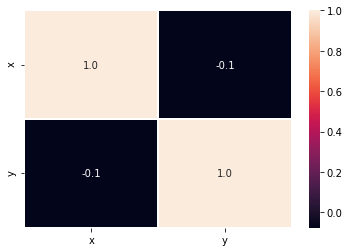

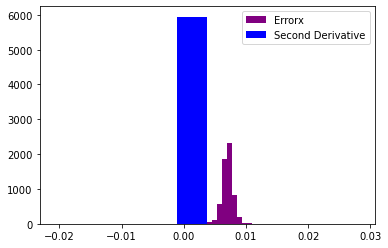

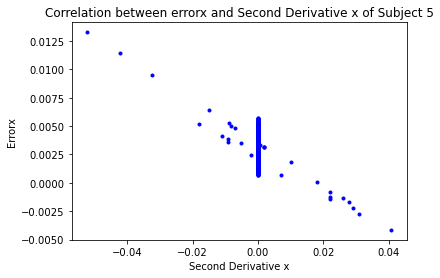

[[ 1.        -0.0473313]
 [-0.0473313  1.       ]]
          x         y
x  1.000000 -0.344401
y -0.344401  1.000000


<Figure size 432x288 with 0 Axes>

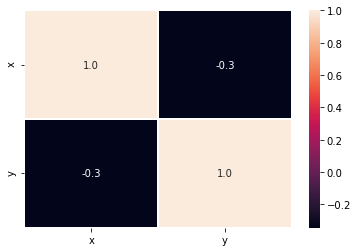

          x         y
x  1.000000 -0.077002
y -0.077002  1.000000


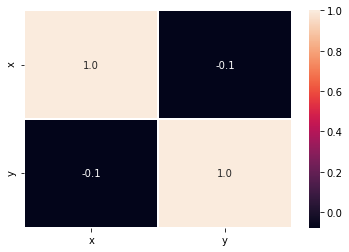

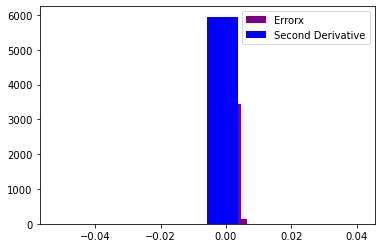

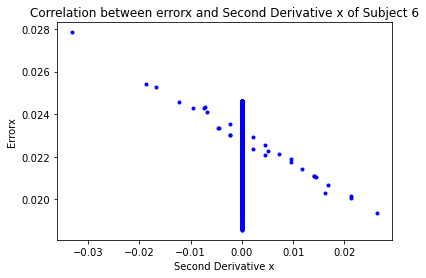

[[ 1.         -0.00951637]
 [-0.00951637  1.        ]]
          x         y
x  1.000000 -0.104667
y -0.104667  1.000000


<Figure size 432x288 with 0 Axes>

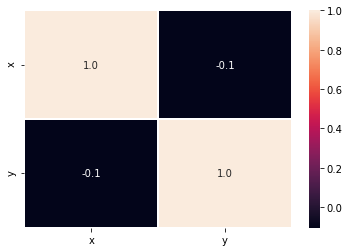

          x         y
x  1.000000 -0.049081
y -0.049081  1.000000


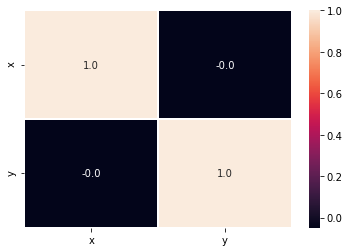

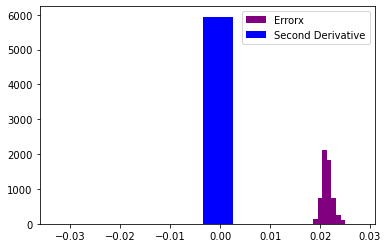

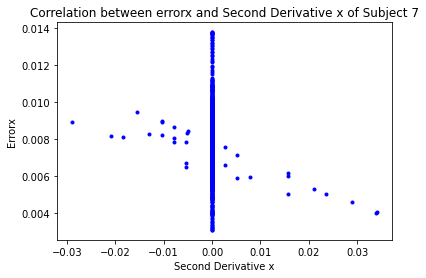

[[ 1.         -0.00587161]
 [-0.00587161  1.        ]]
         x        y
x  1.00000 -0.10113
y -0.10113  1.00000


<Figure size 432x288 with 0 Axes>

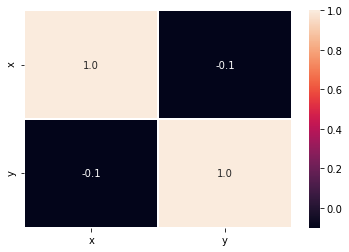

          x         y
x  1.000000 -0.059706
y -0.059706  1.000000


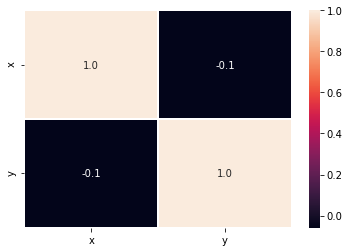

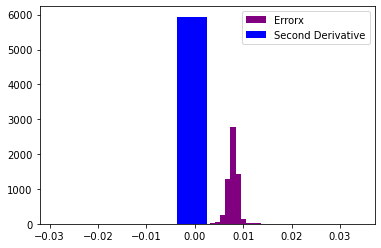

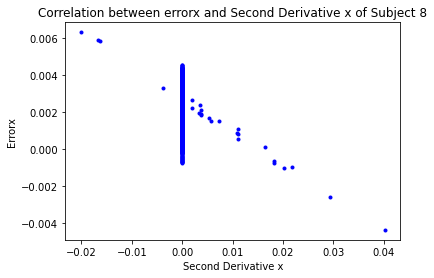

[[ 1.         -0.03255949]
 [-0.03255949  1.        ]]
          x         y
x  1.000000 -0.205503
y -0.205503  1.000000


<Figure size 432x288 with 0 Axes>

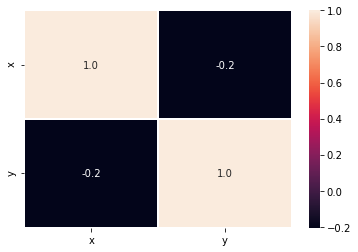

          x         y
x  1.000000 -0.060546
y -0.060546  1.000000


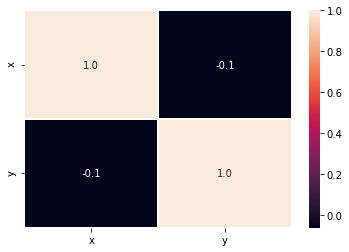

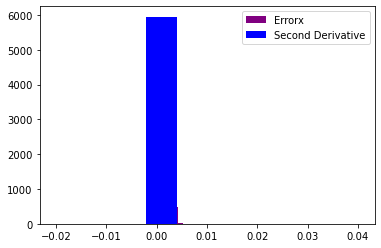

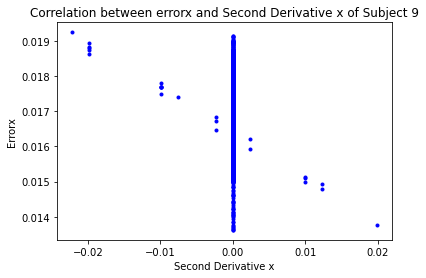

[[1.         0.00657613]
 [0.00657613 1.        ]]
          x         y
x  1.000000 -0.114311
y -0.114311  1.000000


<Figure size 432x288 with 0 Axes>

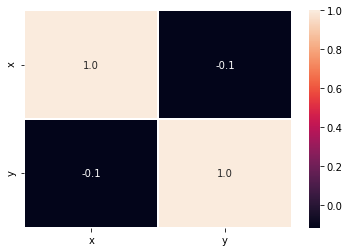

          x         y
x  1.000000 -0.054715
y -0.054715  1.000000


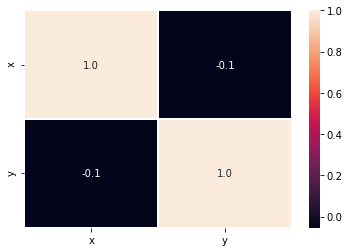

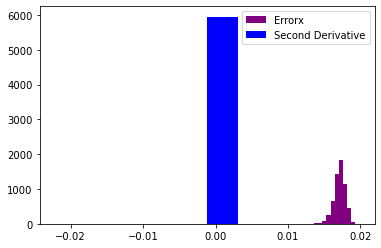

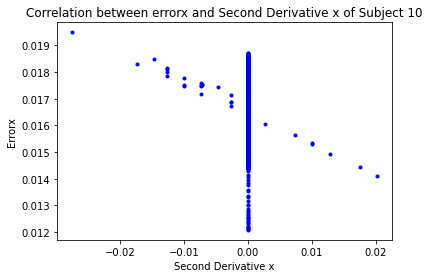

[[ 1.         -0.03617527]
 [-0.03617527  1.        ]]
          x         y
x  1.000000 -0.120592
y -0.120592  1.000000


<Figure size 432x288 with 0 Axes>

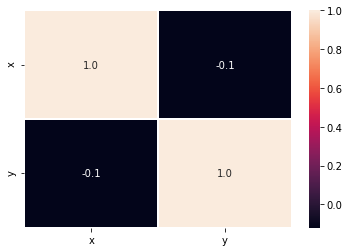

         x        y
x  1.00000 -0.08956
y -0.08956  1.00000


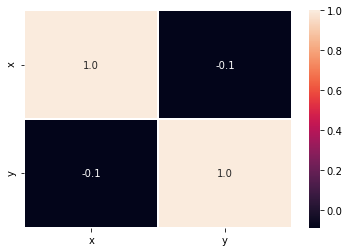

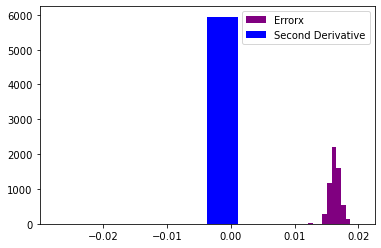

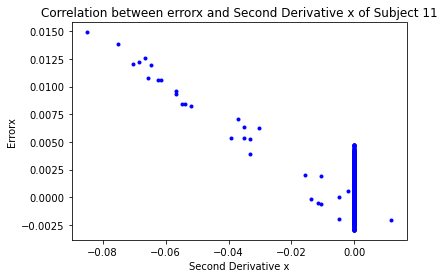

[[ 1.         -0.20329582]
 [-0.20329582  1.        ]]
          x         y
x  1.000000 -0.395397
y -0.395397  1.000000


<Figure size 432x288 with 0 Axes>

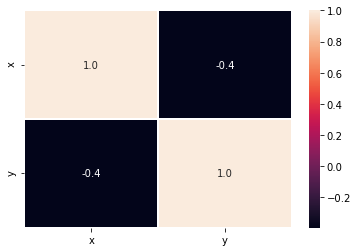

          x         y
x  1.000000 -0.078536
y -0.078536  1.000000


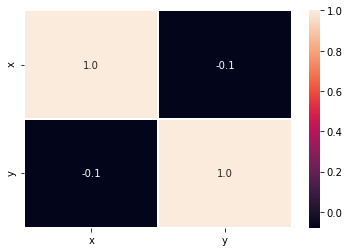

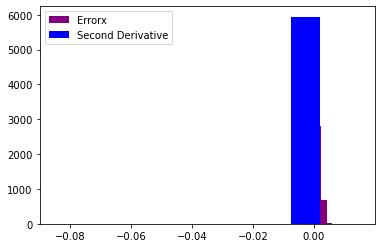

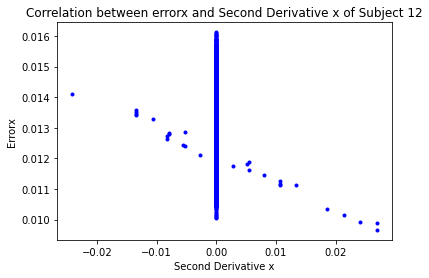

[[ 1.         -0.00771344]
 [-0.00771344  1.        ]]
          x         y
x  1.000000 -0.091051
y -0.091051  1.000000


<Figure size 432x288 with 0 Axes>

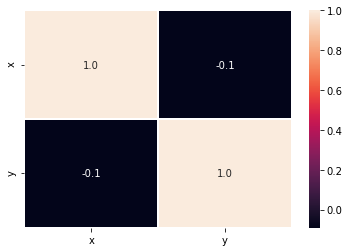

          x         y
x  1.000000 -0.036604
y -0.036604  1.000000


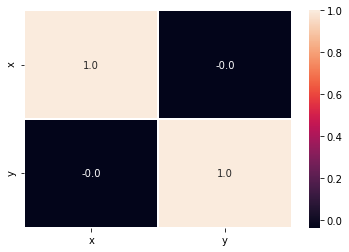

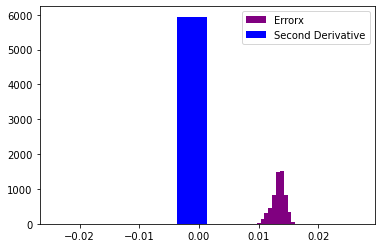

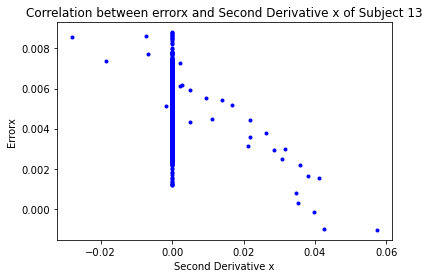

[[ 1.         -0.04125995]
 [-0.04125995  1.        ]]
          x         y
x  1.000000 -0.183188
y -0.183188  1.000000


<Figure size 432x288 with 0 Axes>

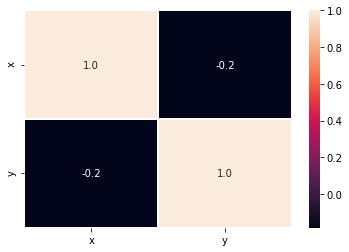

          x         y
x  1.000000 -0.066599
y -0.066599  1.000000


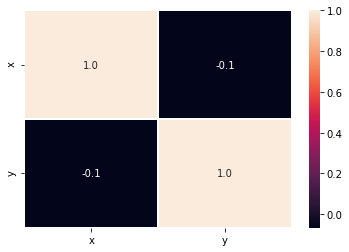

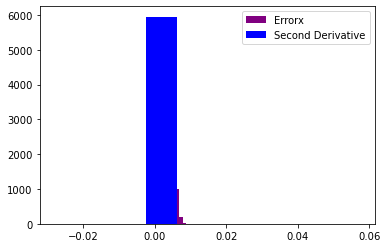

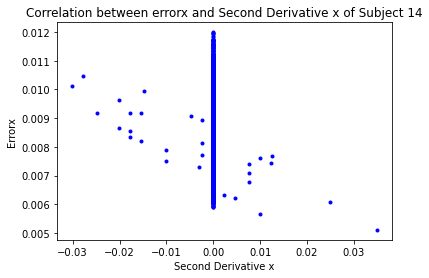

[[ 1.         -0.06172253]
 [-0.06172253  1.        ]]
          x         y
x  1.000000 -0.065234
y -0.065234  1.000000


<Figure size 432x288 with 0 Axes>

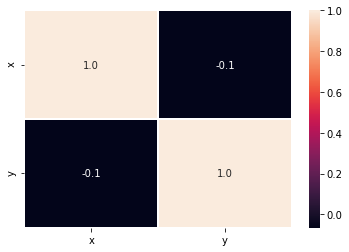

          x         y
x  1.000000 -0.041538
y -0.041538  1.000000


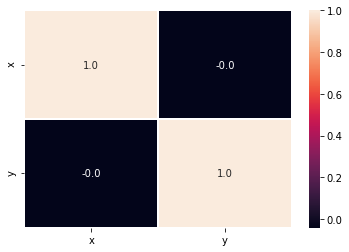

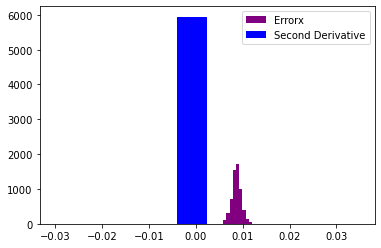

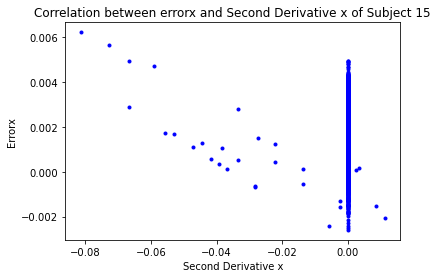

[[ 1.         -0.04928773]
 [-0.04928773  1.        ]]
          x         y
x  1.000000 -0.061892
y -0.061892  1.000000


<Figure size 432x288 with 0 Axes>

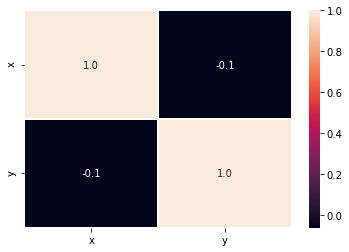

          x         y
x  1.000000  0.002664
y  0.002664  1.000000


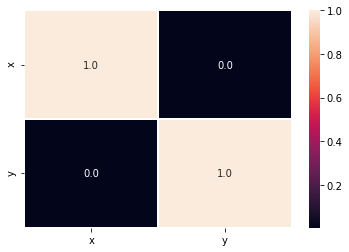

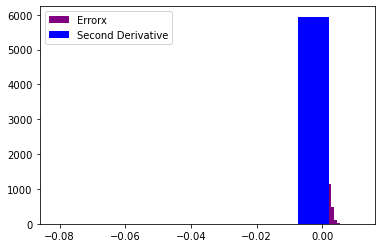

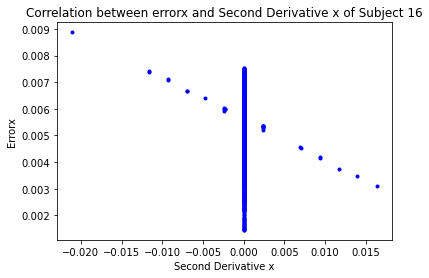

[[ 1.         -0.01525455]
 [-0.01525455  1.        ]]
          x         y
x  1.000000 -0.103429
y -0.103429  1.000000


<Figure size 432x288 with 0 Axes>

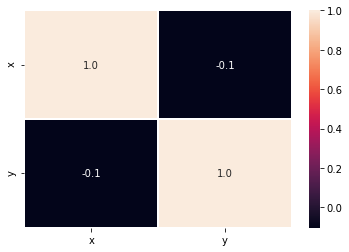

          x         y
x  1.000000 -0.067442
y -0.067442  1.000000


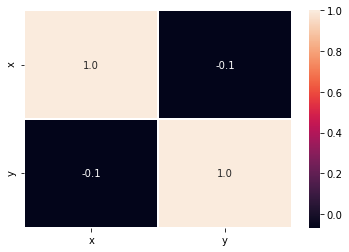

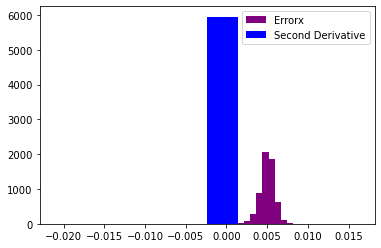

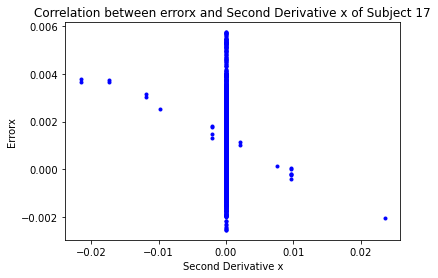

[[ 1.        -0.0339473]
 [-0.0339473  1.       ]]
          x         y
x  1.000000 -0.088326
y -0.088326  1.000000


<Figure size 432x288 with 0 Axes>

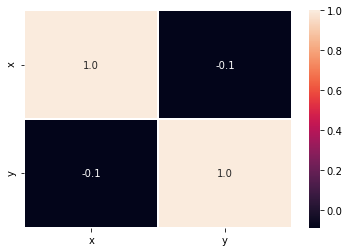

          x         y
x  1.000000 -0.061883
y -0.061883  1.000000


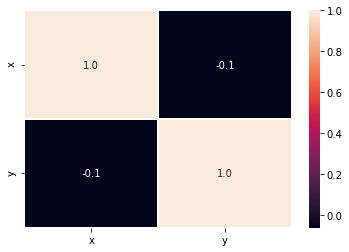

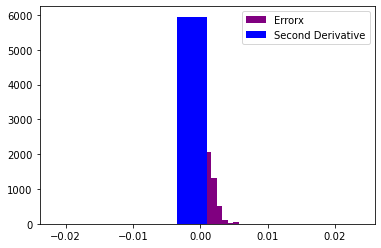

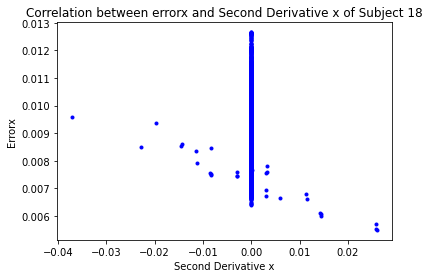

[[ 1.         -0.02406467]
 [-0.02406467  1.        ]]
          x         y
x  1.000000 -0.065071
y -0.065071  1.000000


<Figure size 432x288 with 0 Axes>

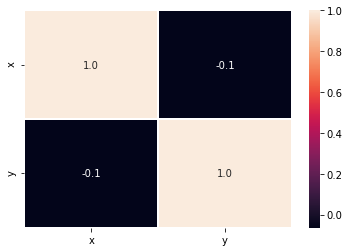

          x         y
x  1.000000 -0.022069
y -0.022069  1.000000


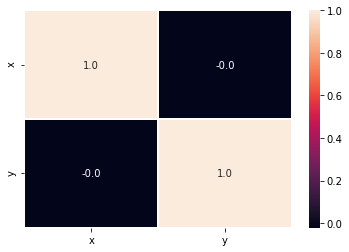

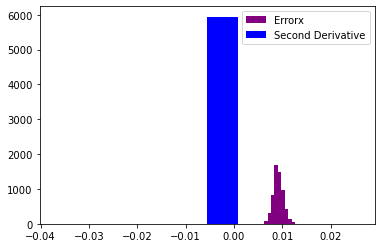

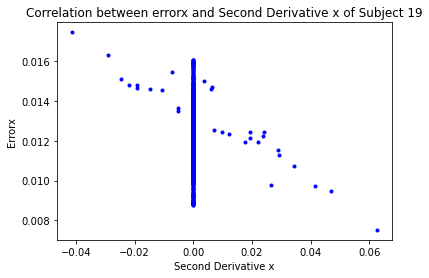

[[ 1.         -0.00915888]
 [-0.00915888  1.        ]]
          x         y
x  1.000000 -0.132943
y -0.132943  1.000000


<Figure size 432x288 with 0 Axes>

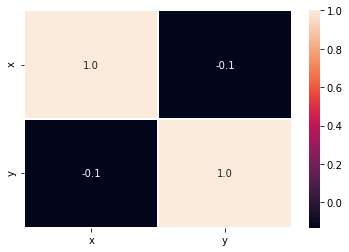

          x         y
x  1.000000 -0.057108
y -0.057108  1.000000


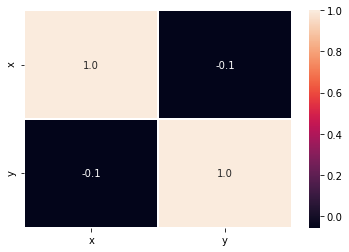

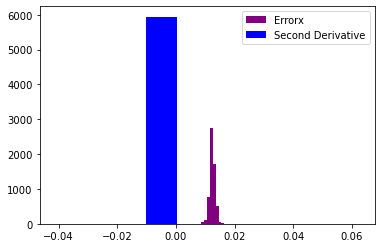

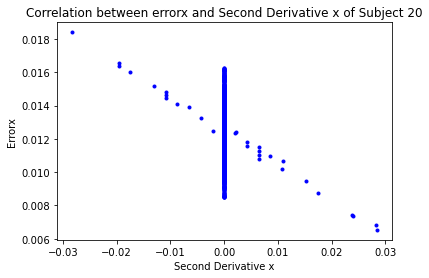

[[ 1.         -0.04466914]
 [-0.04466914  1.        ]]
          x         y
x  1.000000 -0.205744
y -0.205744  1.000000


<Figure size 432x288 with 0 Axes>

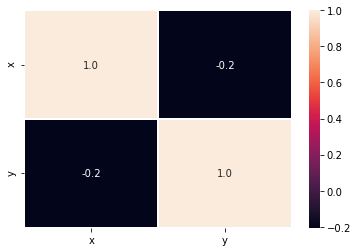

          x         y
x  1.000000 -0.098819
y -0.098819  1.000000


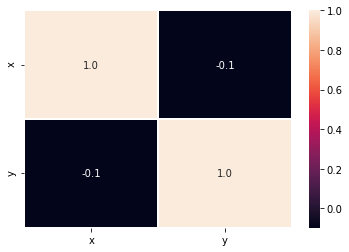

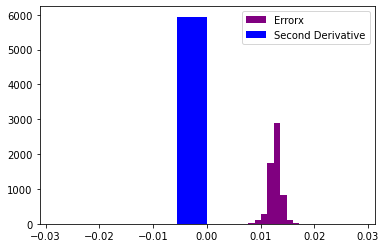

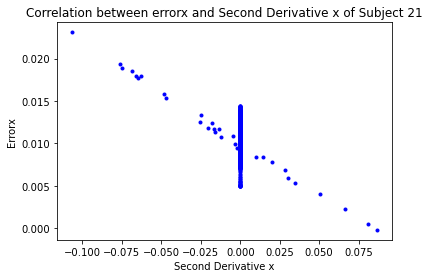

[[ 1.         -0.13111697]
 [-0.13111697  1.        ]]
          x         y
x  1.000000 -0.325742
y -0.325742  1.000000


<Figure size 432x288 with 0 Axes>

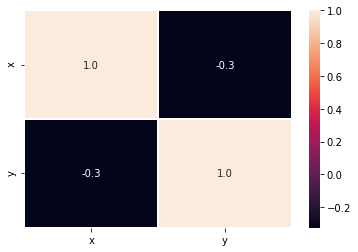

          x         y
x  1.000000 -0.091416
y -0.091416  1.000000


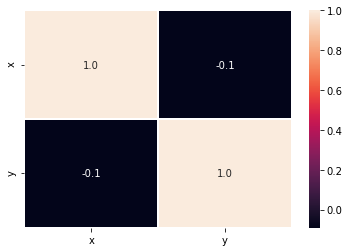

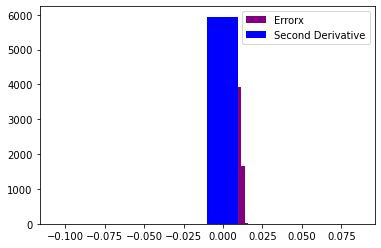

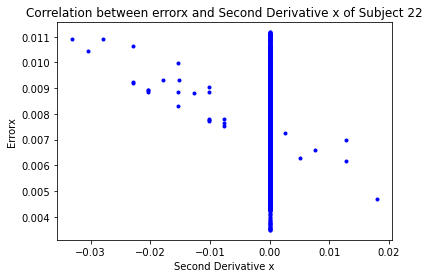

[[ 1.         -0.16658107]
 [-0.16658107  1.        ]]
          x         y
x  1.000000 -0.105284
y -0.105284  1.000000


<Figure size 432x288 with 0 Axes>

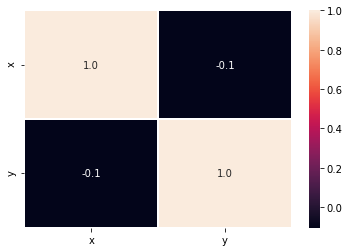

          x         y
x  1.000000 -0.081456
y -0.081456  1.000000


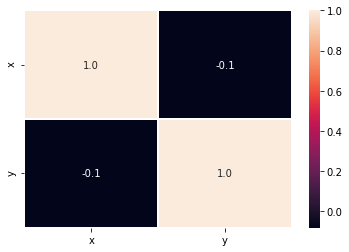

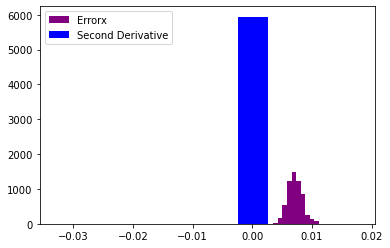

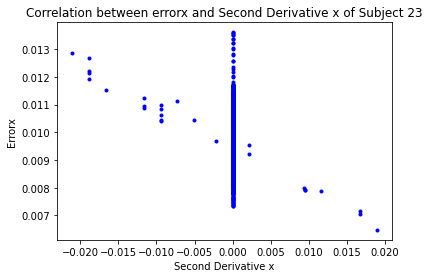

[[ 1.         -0.08680855]
 [-0.08680855  1.        ]]
          x         y
x  1.000000 -0.174542
y -0.174542  1.000000


<Figure size 432x288 with 0 Axes>

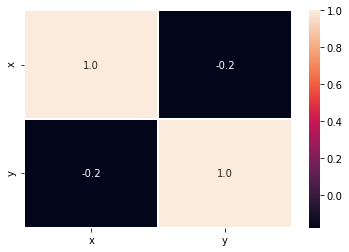

          x         y
x  1.000000 -0.086788
y -0.086788  1.000000


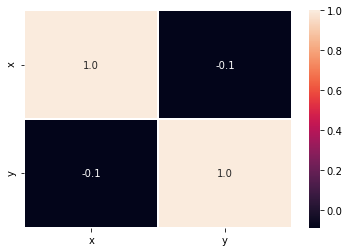

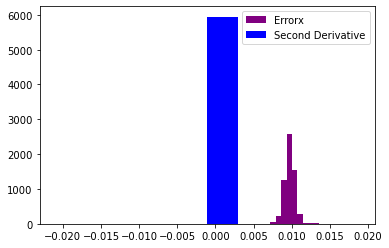

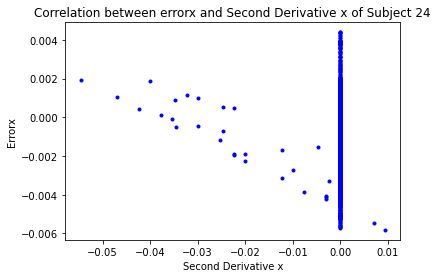

[[ 1.         -0.05352237]
 [-0.05352237  1.        ]]
          x         y
x  1.000000 -0.047961
y -0.047961  1.000000


<Figure size 432x288 with 0 Axes>

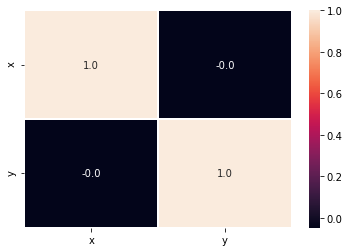

          x         y
x  1.000000 -0.011241
y -0.011241  1.000000


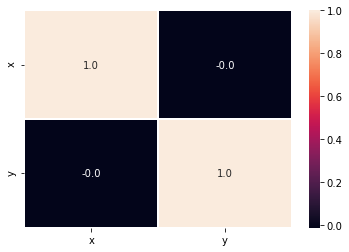

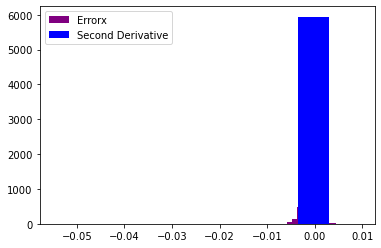

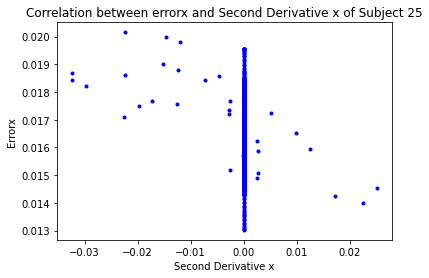

[[ 1.         -0.07317815]
 [-0.07317815  1.        ]]
          x         y
x  1.000000 -0.132875
y -0.132875  1.000000


<Figure size 432x288 with 0 Axes>

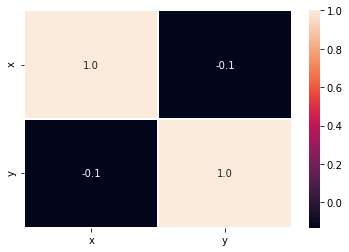

          x         y
x  1.000000 -0.084195
y -0.084195  1.000000


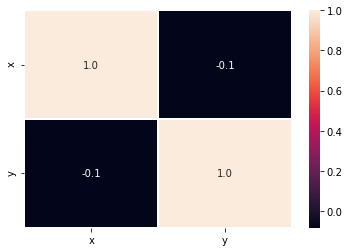

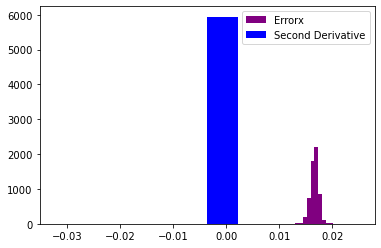

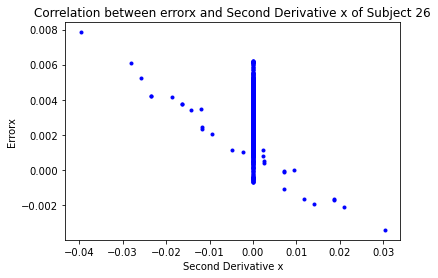

[[ 1.         -0.08608609]
 [-0.08608609  1.        ]]
          x         y
x  1.000000 -0.156601
y -0.156601  1.000000


<Figure size 432x288 with 0 Axes>

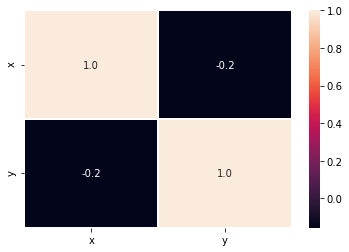

          x         y
x  1.000000 -0.056343
y -0.056343  1.000000


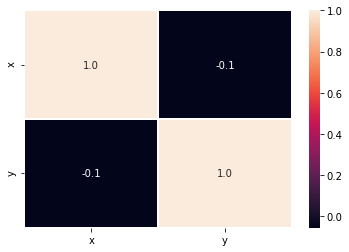

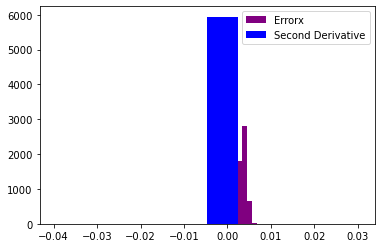

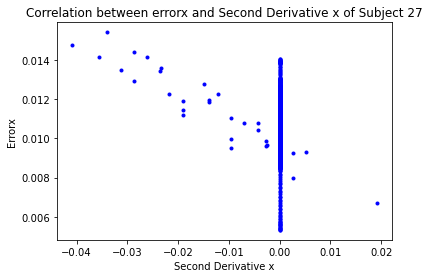

[[ 1.         -0.26231142]
 [-0.26231142  1.        ]]
          x         y
x  1.000000 -0.154788
y -0.154788  1.000000


<Figure size 432x288 with 0 Axes>

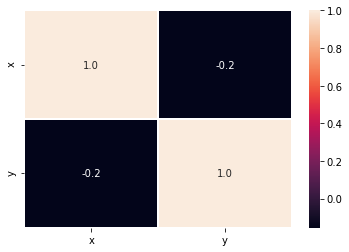

          x         y
x  1.000000 -0.064942
y -0.064942  1.000000


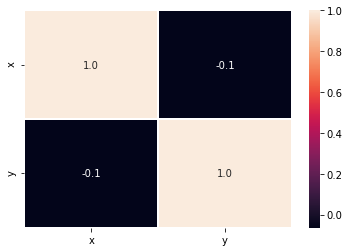

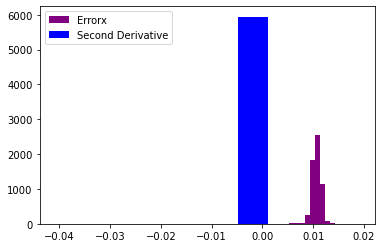

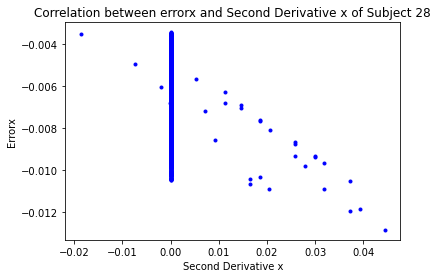

[[ 1.         -0.00749063]
 [-0.00749063  1.        ]]
          x         y
x  1.000000 -0.132724
y -0.132724  1.000000


<Figure size 432x288 with 0 Axes>

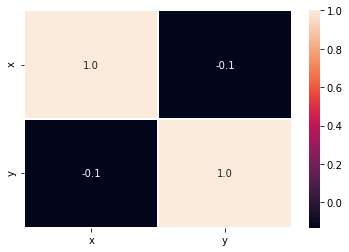

          x         y
x  1.000000 -0.074887
y -0.074887  1.000000


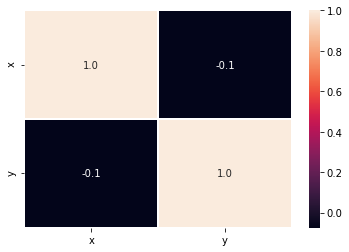

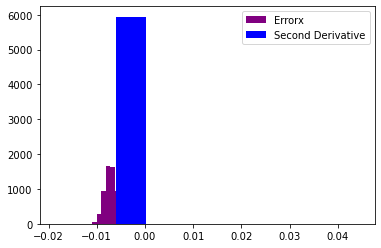

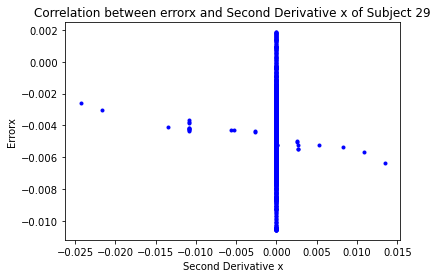

[[ 1.         -0.05291048]
 [-0.05291048  1.        ]]
          x         y
x  1.000000 -0.029992
y -0.029992  1.000000


<Figure size 432x288 with 0 Axes>

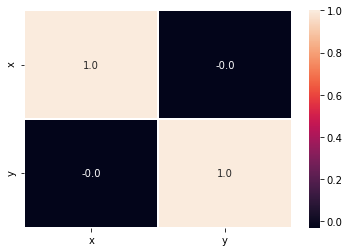

         x        y
x  1.00000 -0.04078
y -0.04078  1.00000


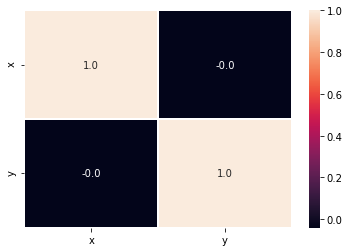

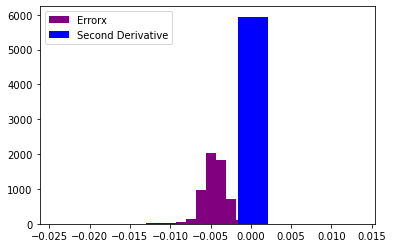

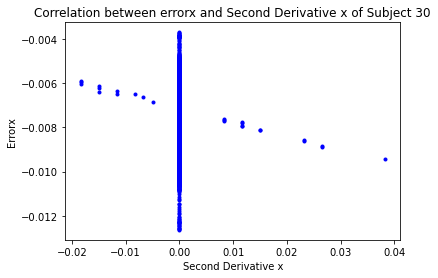

[[1.         0.00813167]
 [0.00813167 1.        ]]
          x         y
x  1.000000 -0.051823
y -0.051823  1.000000


<Figure size 432x288 with 0 Axes>

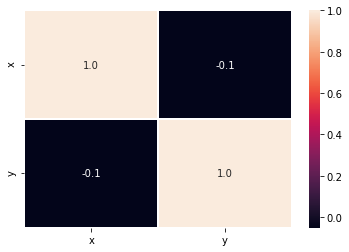

          x         y
x  1.000000 -0.057798
y -0.057798  1.000000


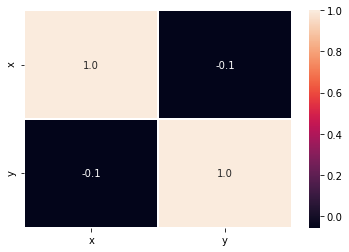

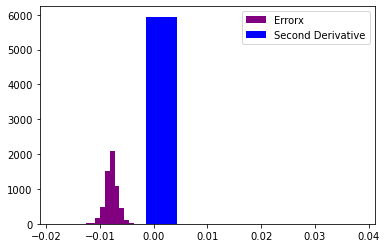

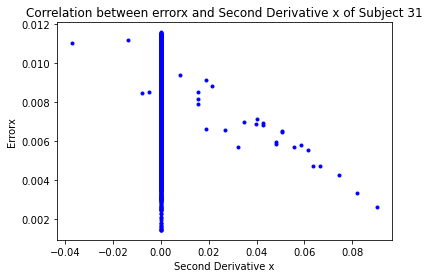

[[ 1.         -0.05001402]
 [-0.05001402  1.        ]]
          x         y
x  1.000000 -0.070608
y -0.070608  1.000000


<Figure size 432x288 with 0 Axes>

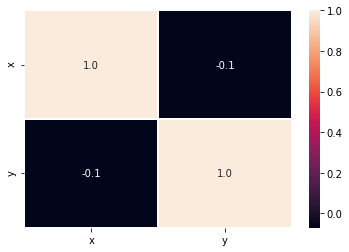

          x         y
x  1.000000 -0.048471
y -0.048471  1.000000


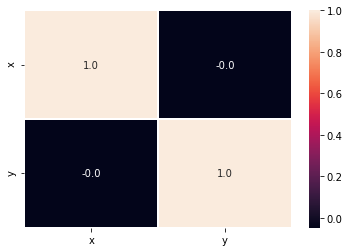

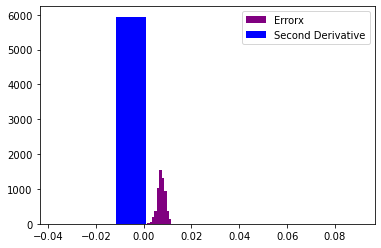

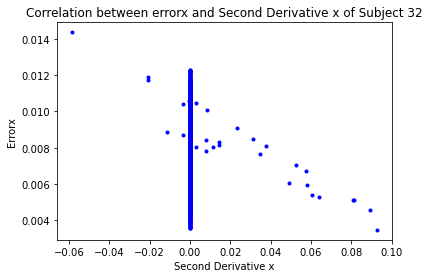

[[ 1.         -0.01846818]
 [-0.01846818  1.        ]]
          x         y
x  1.000000 -0.084006
y -0.084006  1.000000


<Figure size 432x288 with 0 Axes>

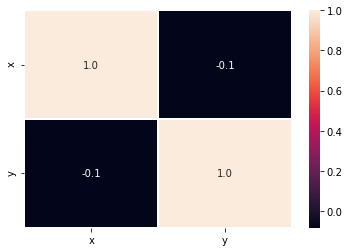

          x         y
x  1.000000 -0.048937
y -0.048937  1.000000


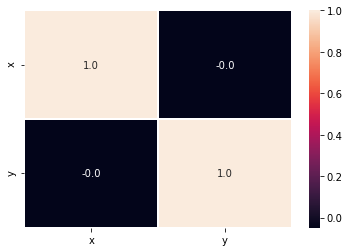

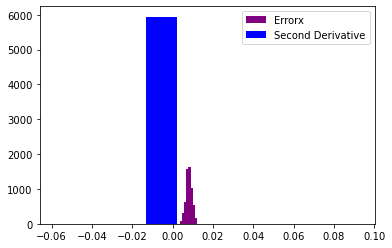

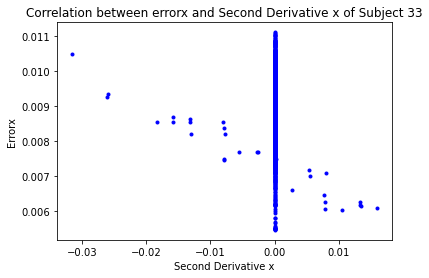

[[ 1.         -0.05498683]
 [-0.05498683  1.        ]]
          x         y
x  1.000000 -0.068176
y -0.068176  1.000000


<Figure size 432x288 with 0 Axes>

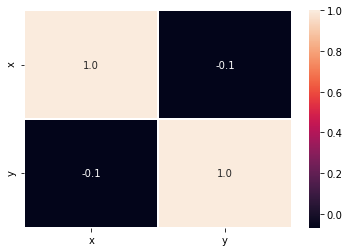

          x         y
x  1.000000 -0.024844
y -0.024844  1.000000


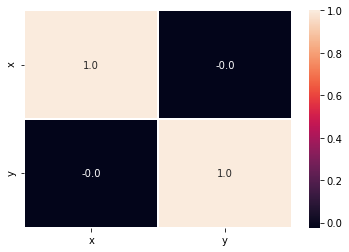

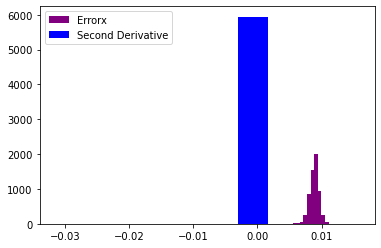

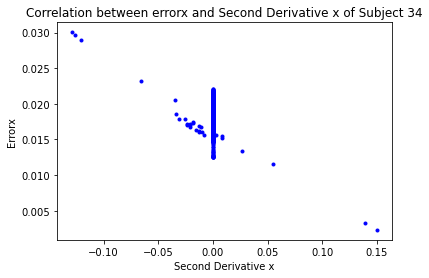

[[ 1.         -0.09733751]
 [-0.09733751  1.        ]]
          x         y
x  1.000000 -0.319981
y -0.319981  1.000000


<Figure size 432x288 with 0 Axes>

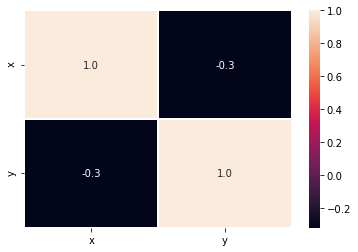

          x         y
x  1.000000 -0.009887
y -0.009887  1.000000


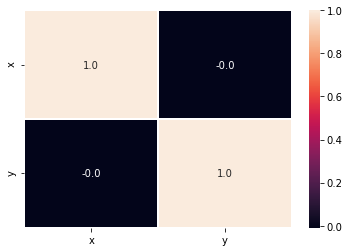

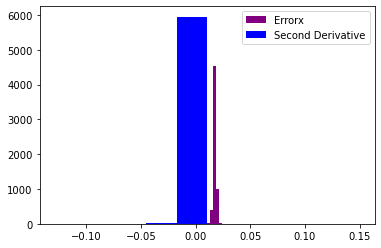

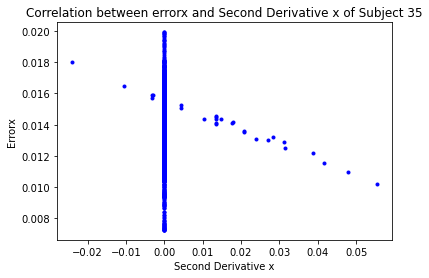

[[ 1.        -0.0658282]
 [-0.0658282  1.       ]]
          x         y
x  1.000000 -0.041132
y -0.041132  1.000000


<Figure size 432x288 with 0 Axes>

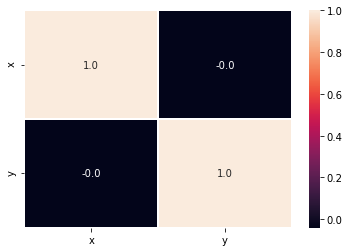

          x         y
x  1.000000 -0.029102
y -0.029102  1.000000


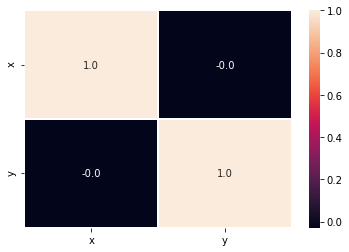

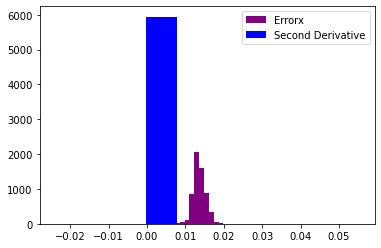

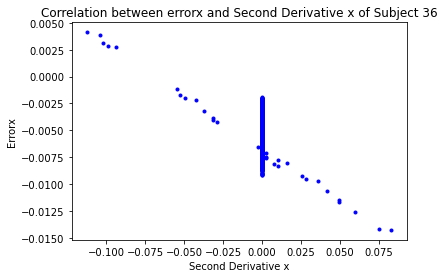

[[ 1.        -0.1143715]
 [-0.1143715  1.       ]]
          x         y
x  1.000000 -0.308027
y -0.308027  1.000000


<Figure size 432x288 with 0 Axes>

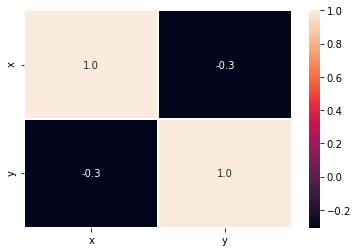

          x         y
x  1.000000 -0.110073
y -0.110073  1.000000


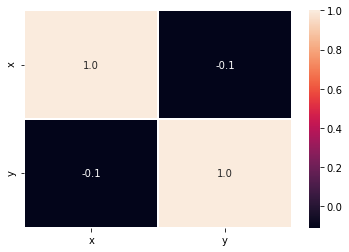

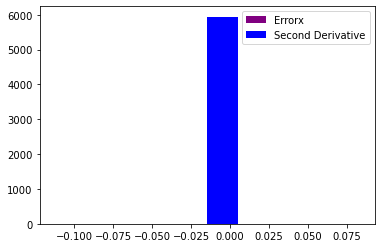

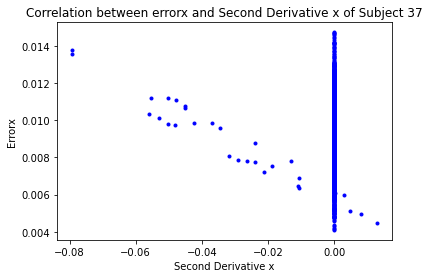

[[ 1.         -0.15653006]
 [-0.15653006  1.        ]]
         x        y
x  1.00000 -0.04306
y -0.04306  1.00000


<Figure size 432x288 with 0 Axes>

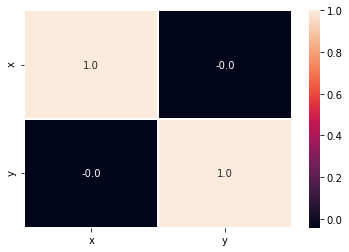

          x         y
x  1.000000 -0.017442
y -0.017442  1.000000


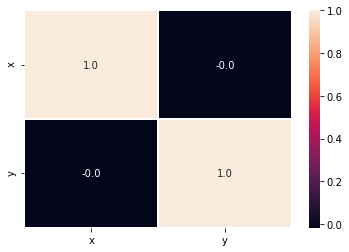

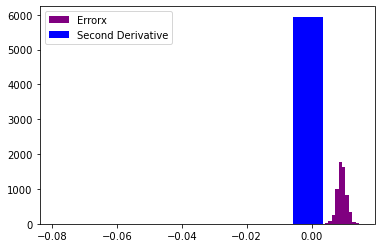

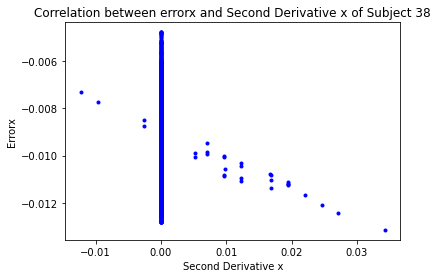

[[ 1.         -0.09053709]
 [-0.09053709  1.        ]]
          x         y
x  1.000000 -0.098738
y -0.098738  1.000000


<Figure size 432x288 with 0 Axes>

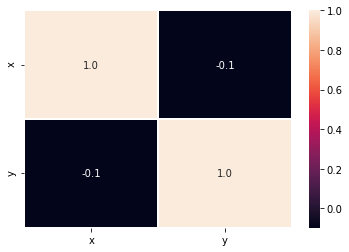

          x         y
x  1.000000 -0.089089
y -0.089089  1.000000


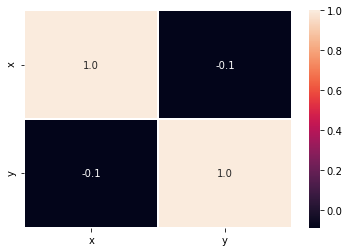

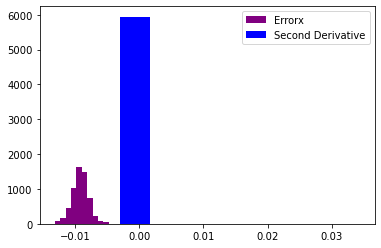

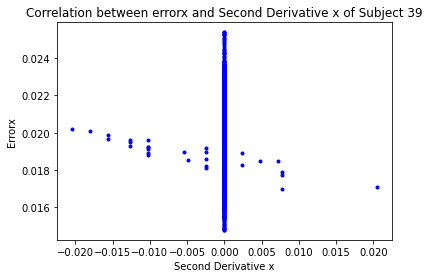

[[ 1.        -0.0220099]
 [-0.0220099  1.       ]]
          x         y
x  1.000000 -0.012698
y -0.012698  1.000000


<Figure size 432x288 with 0 Axes>

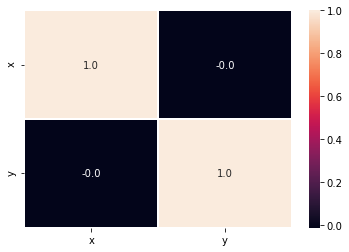

          x         y
x  1.000000  0.007677
y  0.007677  1.000000


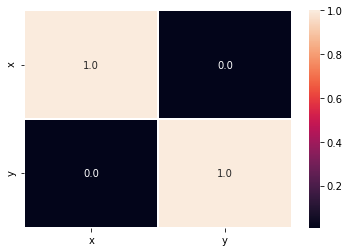

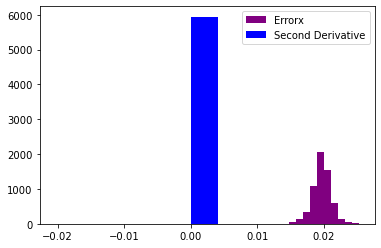

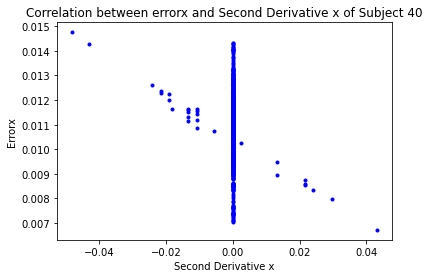

[[ 1.         -0.01503134]
 [-0.01503134  1.        ]]
          x         y
x  1.000000 -0.168826
y -0.168826  1.000000


<Figure size 432x288 with 0 Axes>

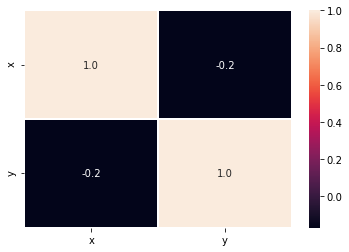

          x         y
x  1.000000 -0.093779
y -0.093779  1.000000


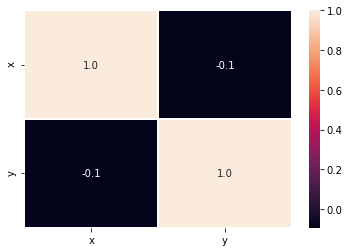

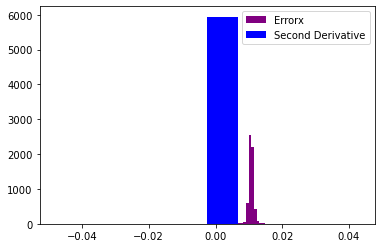

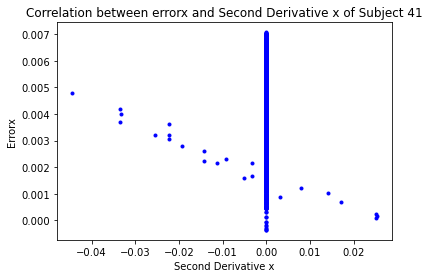

[[1.       0.038192]
 [0.038192 1.      ]]
          x         y
x  1.000000 -0.018268
y -0.018268  1.000000


<Figure size 432x288 with 0 Axes>

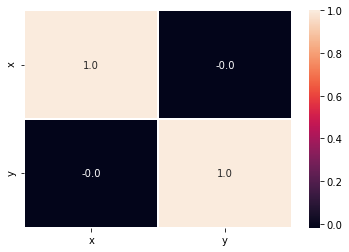

          x         y
x  1.000000  0.038541
y  0.038541  1.000000


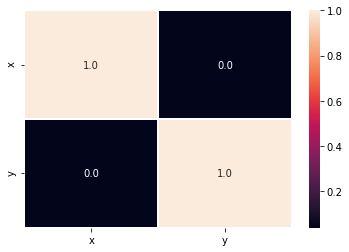

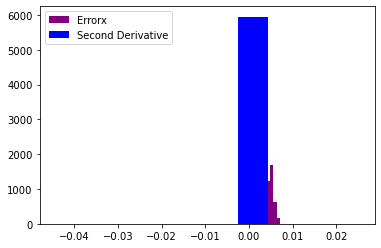

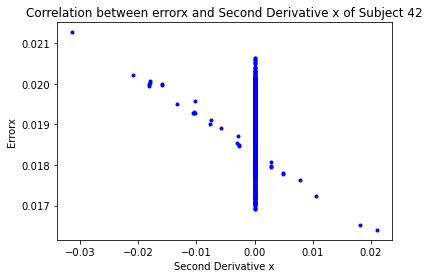

[[ 1.         -0.10611309]
 [-0.10611309  1.        ]]
         x        y
x  1.00000 -0.16241
y -0.16241  1.00000


<Figure size 432x288 with 0 Axes>

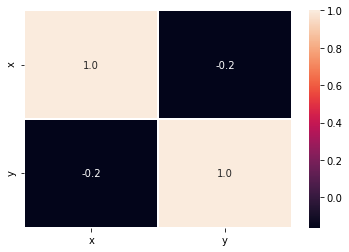

          x         y
x  1.000000 -0.086955
y -0.086955  1.000000


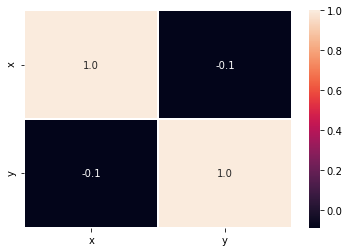

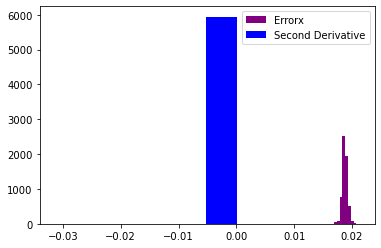

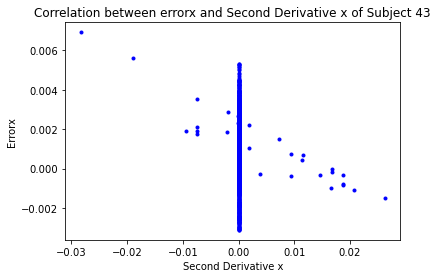

[[ 1.         -0.01314487]
 [-0.01314487  1.        ]]
          x         y
x  1.000000 -0.106696
y -0.106696  1.000000


<Figure size 432x288 with 0 Axes>

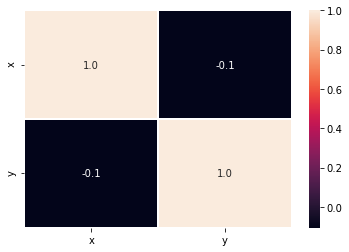

          x         y
x  1.000000 -0.080339
y -0.080339  1.000000


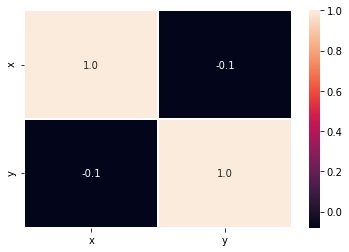

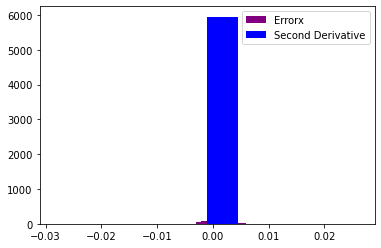

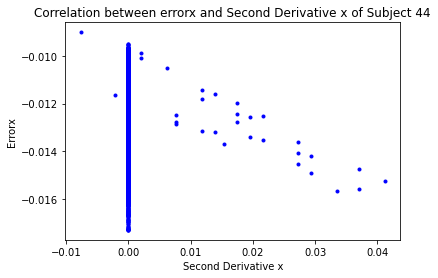

[[ 1.         -0.18975416]
 [-0.18975416  1.        ]]
          x         y
x  1.000000 -0.048602
y -0.048602  1.000000


<Figure size 432x288 with 0 Axes>

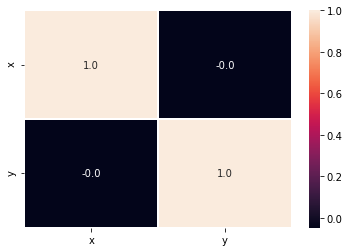

          x         y
x  1.000000 -0.019908
y -0.019908  1.000000


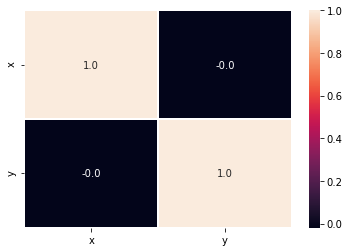

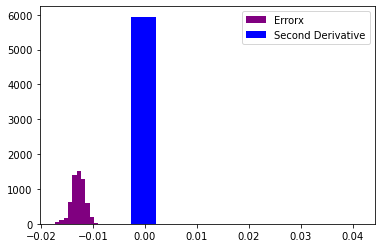

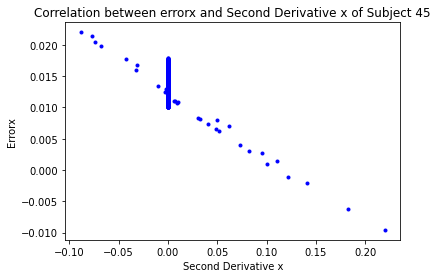

[[ 1.        -0.0733902]
 [-0.0733902  1.       ]]
          x         y
x  1.000000 -0.394135
y -0.394135  1.000000


<Figure size 432x288 with 0 Axes>

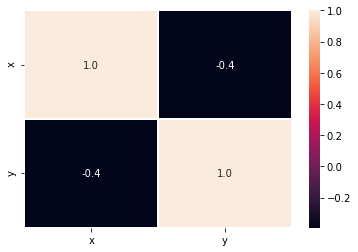

          x         y
x  1.000000 -0.097906
y -0.097906  1.000000


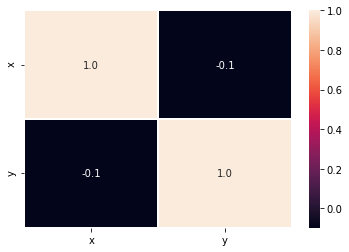

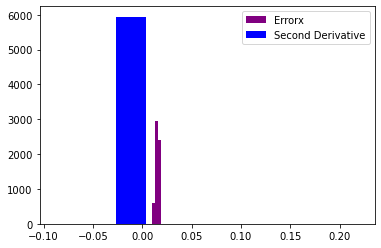

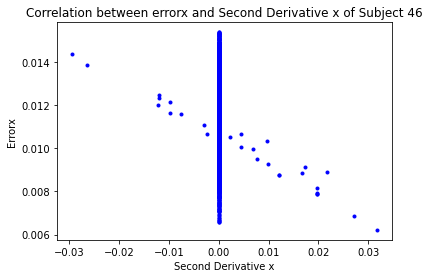

[[1.         0.01165908]
 [0.01165908 1.        ]]
          x         y
x  1.000000 -0.107806
y -0.107806  1.000000


<Figure size 432x288 with 0 Axes>

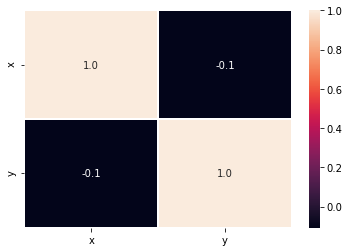

          x         y
x  1.000000 -0.077858
y -0.077858  1.000000


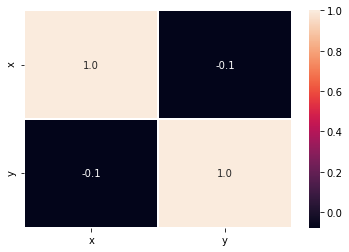

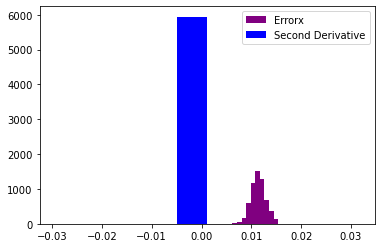

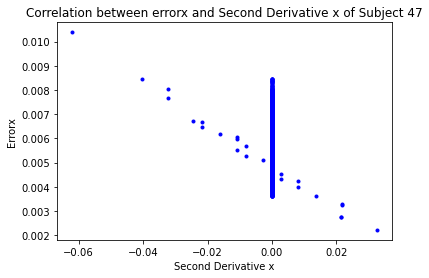

[[ 1.         -0.08612229]
 [-0.08612229  1.        ]]
          x         y
x  1.000000 -0.157892
y -0.157892  1.000000


<Figure size 432x288 with 0 Axes>

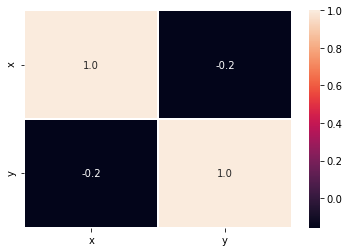

          x         y
x  1.000000 -0.076536
y -0.076536  1.000000


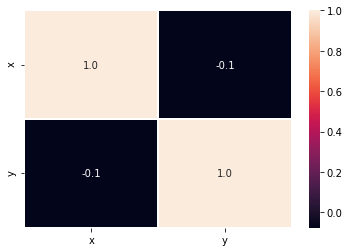

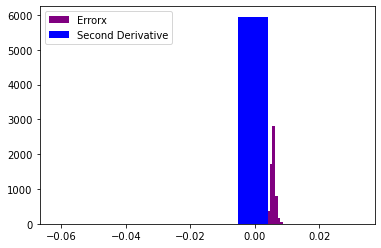

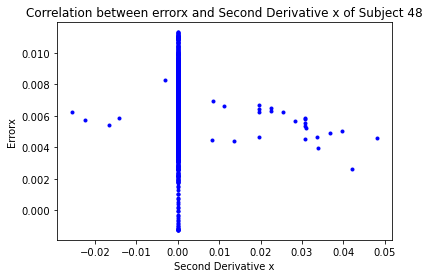

[[1.         0.01448718]
 [0.01448718 1.        ]]
          x         y
x  1.000000 -0.050762
y -0.050762  1.000000


<Figure size 432x288 with 0 Axes>

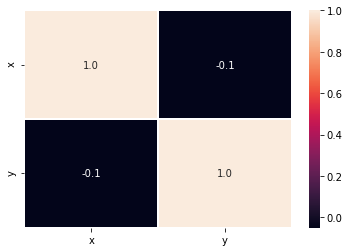

          x         y
x  1.000000 -0.042471
y -0.042471  1.000000


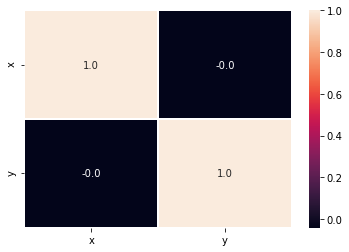

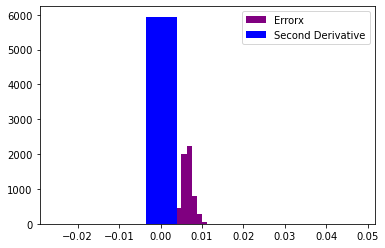

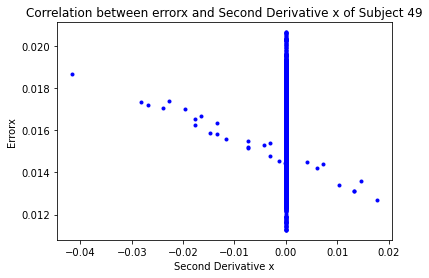

[[ 1.         -0.16434833]
 [-0.16434833  1.        ]]
          x         y
x  1.000000 -0.046504
y -0.046504  1.000000


<Figure size 432x288 with 0 Axes>

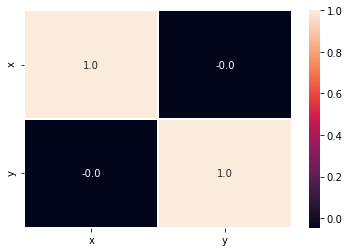

        x       y
x  1.0000 -0.0149
y -0.0149  1.0000


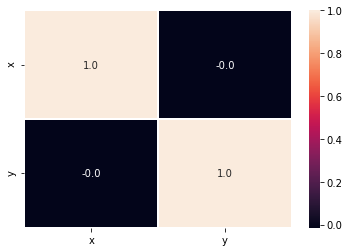

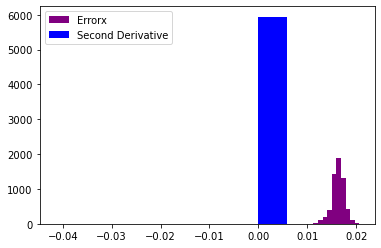

In [17]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2x,
         'y': errorx
         }
    df=pd.DataFrame(data)
    plt.figure()
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Second Derivative x")
    plt.ylabel("Errorx")
    plt.title("Correlation between errorx and Second Derivative x of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d2x,COPXmatrix)
    print(r)
    plt.figure()
    data={'x':d2x,
          'y': errorx
         }
    df=pd.DataFrame(data)
    plt.figure()
    correlation=df.corr()
    print(correlation)
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()
    plt.figure()
    correlationpearson=df.corr(method='pearson')
    print(correlationpearson)
    plot=sns.heatmap(correlationpearson,annot= True, fmt='.1f',linewidths=.6)
    plt.show()
    plt.figure()
    correlationspearman=df.corr(method='spearman')
    print(correlationspearman)
    plot=sns.heatmap(correlationspearman,annot= True, fmt='.1f',linewidths=.6)
    plt.show()
    #histogramas
    plt.figure()
    hist=plt.hist(errorx,color='purple',label="Errorx")
    hist2=plt.hist(d2x, color='blue',label="Second Derivative")
    plt.legend()
    plt.show()

In [15]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2x,
         'y': errorx
         }
    df=pd.DataFrame(data)
    mediaerro=(np.sum(errorx))/(len(errorx))
    mediad2x=(np.sum(d2x))/(len(d2x))
    print("A média de erros de {} é {}".format(s,mediaerro))
    print("A média da segunda derivada de {} é {}".format(s,mediad2x))
    varx=[]
    for i in range(0,len(d2x)):
        varx.append((d2x[i]-mediad2x)**2)
    varx2=(np.sum(varx))/(len(d2x))
    dpx=varx2**0.5
    vary=[]
    for u in range(0,len(errorx)):
        vary.append((errorx[u]-mediaerro)**2)
    vary2=(np.sum(vary))/(len(errorx))
    dpy=vary2**0.5
    print("O desvio padrão do erro de {} é {}".format(s,dpx))
    print("O desvio padrão da segunda derivada de {} é {}".format(s,dpy))

A média de erros de 1 é 0.005014038637798487
A média da segunda derivada de 1 é 5.327050731024975e-05
O desvio padrão do erro de 1 é 0.0017888101080713013
O desvio padrão da segunda derivada de 1 é 0.000986995638487179
A média de erros de 2 é 0.008925908542875671
A média da segunda derivada de 2 é -0.00014358034326669743
O desvio padrão do erro de 2 é 0.002258916791710221
O desvio padrão da segunda derivada de 2 é 0.001209888610494493
A média de erros de 3 é 0.014646969064340291
A média da segunda derivada de 3 é -6.688054325076444e-05
O desvio padrão do erro de 3 é 0.0013069383620302715
O desvio padrão da segunda derivada de 3 é 0.0008034862453521203
A média de erros de 4 é 0.00703377074901502
A média da segunda derivada de 4 é -3.383720433477085e-07
O desvio padrão do erro de 4 é 0.0008057235494756683
O desvio padrão da segunda derivada de 4 é 0.0008715794789832675
A média de erros de 5 é 0.002990522746092952
A média da segunda derivada de 5 é 7.016056551200742e-06
O desvio padrão do

Correlation between errorz and Second Derivative z

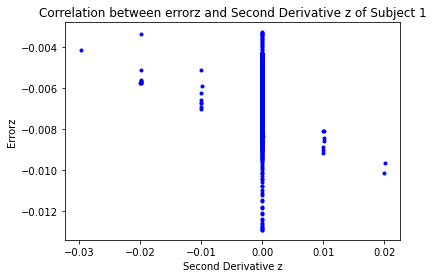

[[ 1.         -0.11212859]
 [-0.11212859  1.        ]]


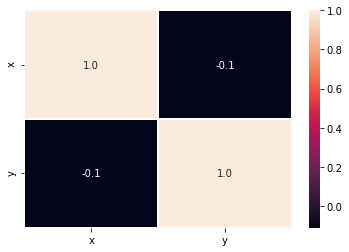

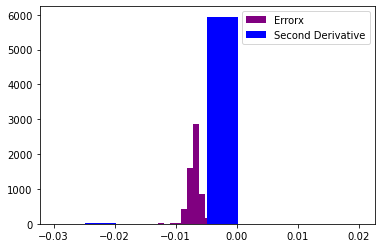

A média de erros é -0.006894928918740204


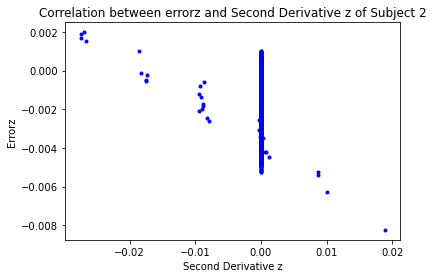

[[ 1.         -0.15649492]
 [-0.15649492  1.        ]]


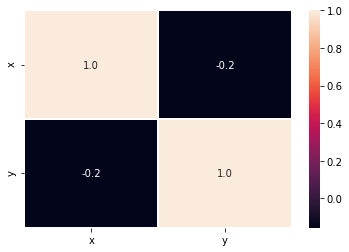

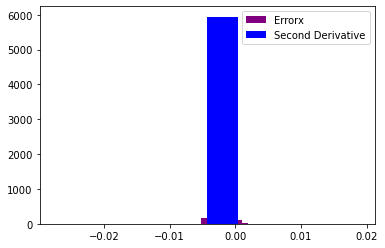

A média de erros é -0.00231390774670916


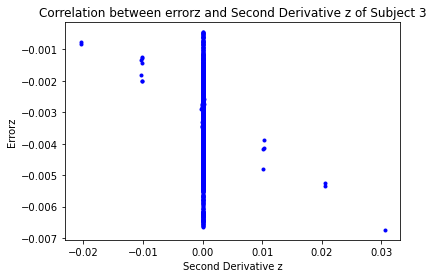

[[ 1.         -0.10834905]
 [-0.10834905  1.        ]]


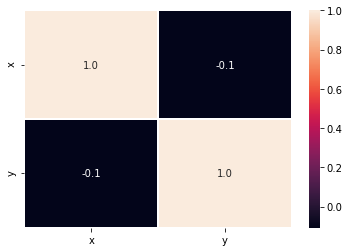

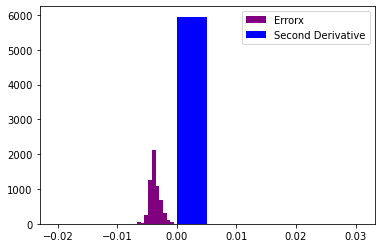

A média de erros é -0.0037118016774054336


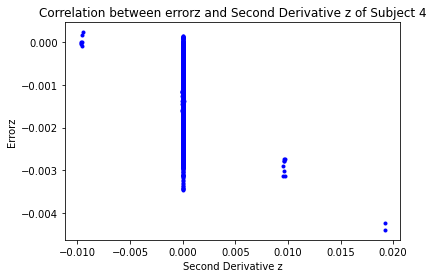

[[ 1.         -0.15589562]
 [-0.15589562  1.        ]]


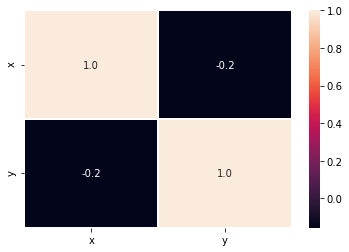

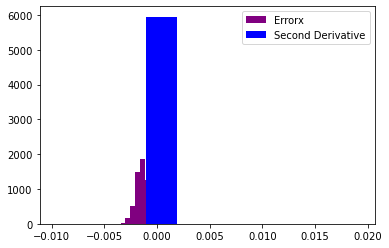

A média de erros é -0.0014290043885836915


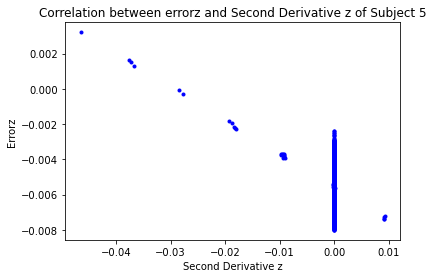

[[ 1.         -0.32958939]
 [-0.32958939  1.        ]]


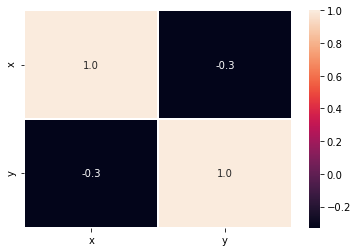

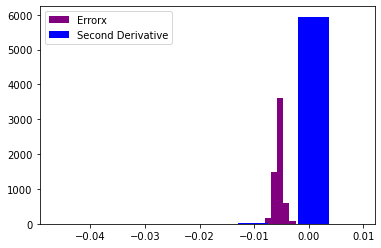

A média de erros é -0.005411882354216867


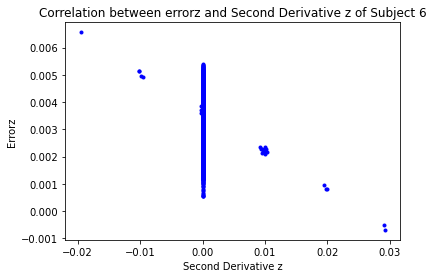

[[ 1.         -0.14279793]
 [-0.14279793  1.        ]]


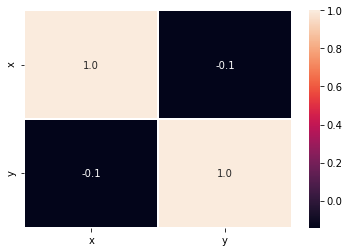

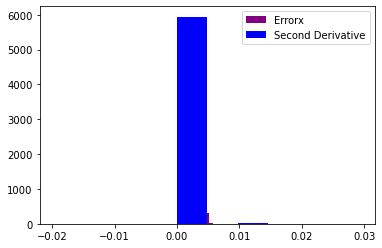

A média de erros é 0.0030608344371635524


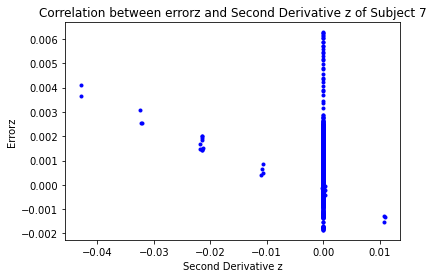

[[ 1.         -0.12301547]
 [-0.12301547  1.        ]]


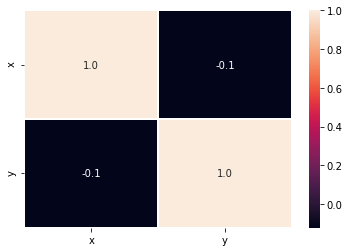

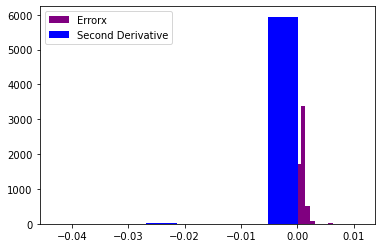

A média de erros é 0.0007976929752023682


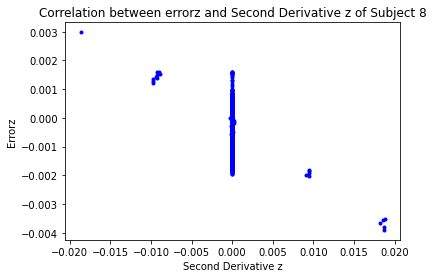

[[ 1.         -0.29590303]
 [-0.29590303  1.        ]]


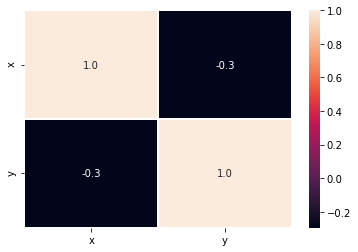

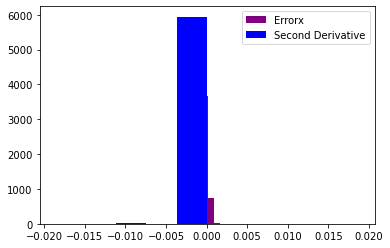

A média de erros é -0.00022540160999358897


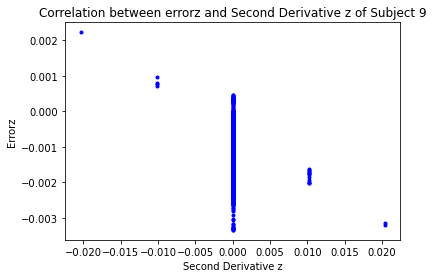

[[ 1.         -0.15306868]
 [-0.15306868  1.        ]]


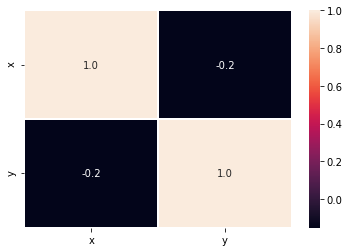

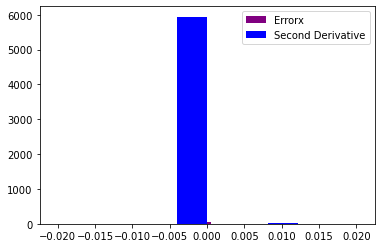

A média de erros é -0.0012158977179692059


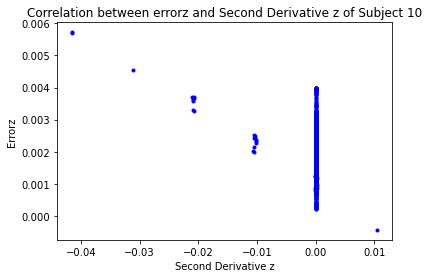

[[ 1.         -0.20417772]
 [-0.20417772  1.        ]]


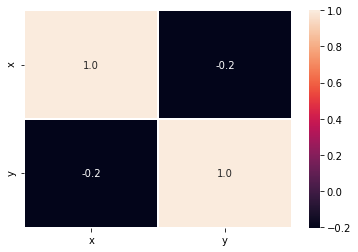

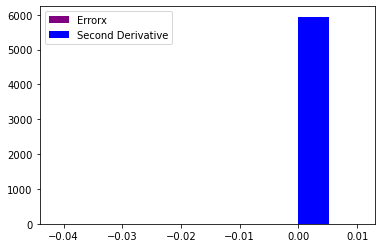

A média de erros é 0.002053376533879568


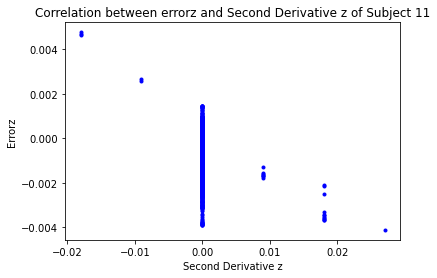

[[ 1.         -0.23948448]
 [-0.23948448  1.        ]]


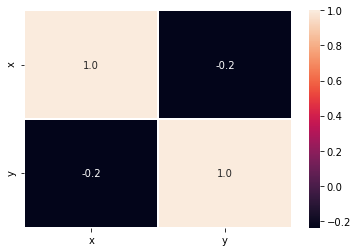

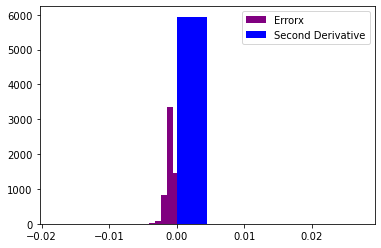

A média de erros é -0.0008888200872174474


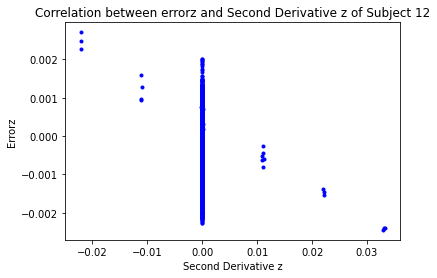

[[ 1.         -0.14018579]
 [-0.14018579  1.        ]]


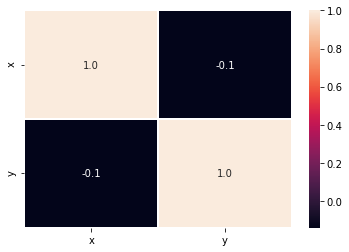

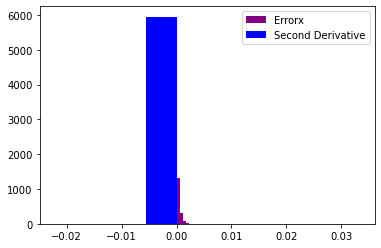

A média de erros é -0.00018422924533928638


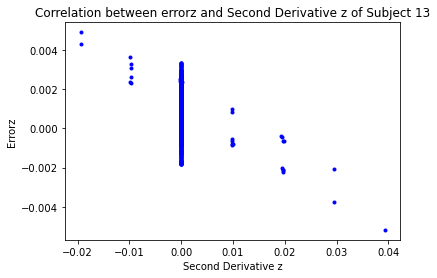

[[ 1.         -0.21687613]
 [-0.21687613  1.        ]]


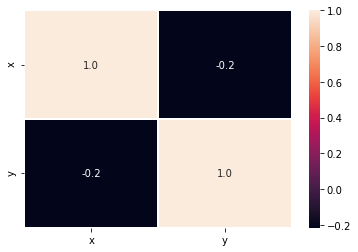

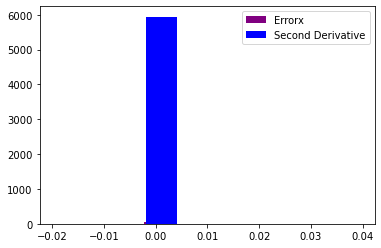

A média de erros é 0.0007839131479779164


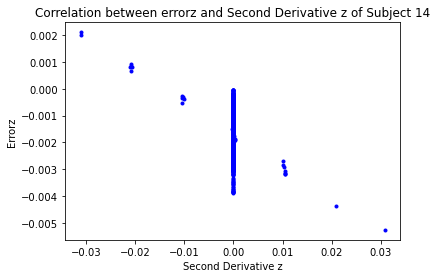

[[ 1.         -0.24524129]
 [-0.24524129  1.        ]]


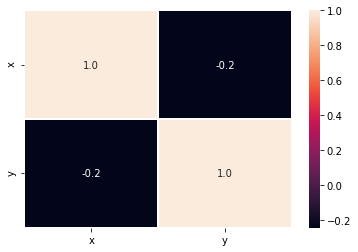

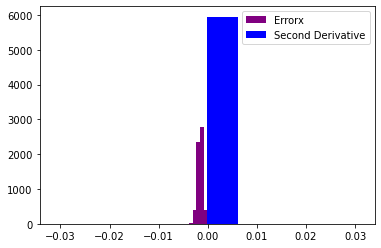

A média de erros é -0.001558103992594667


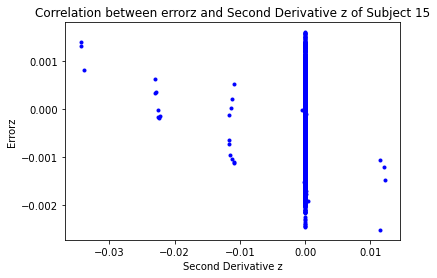

[[ 1.         -0.06381031]
 [-0.06381031  1.        ]]


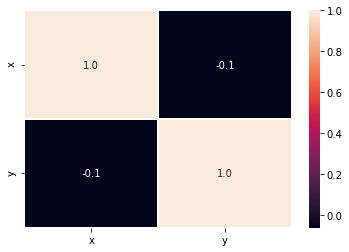

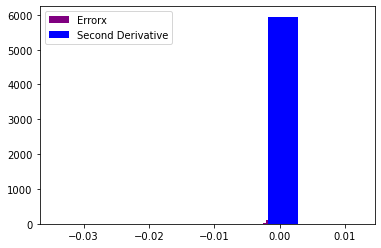

A média de erros é -0.0004300884319425306


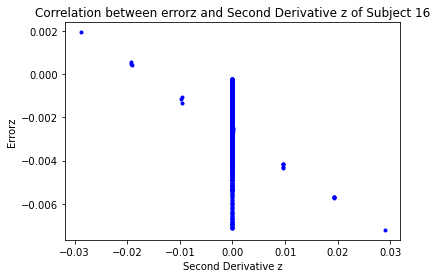

[[ 1.         -0.19091792]
 [-0.19091792  1.        ]]


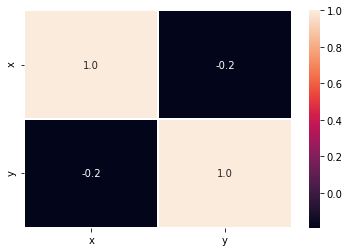

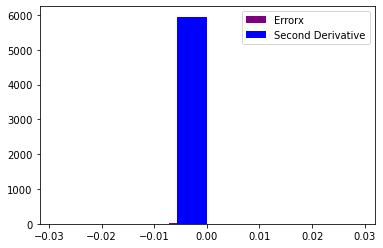

A média de erros é -0.0023209502381047417


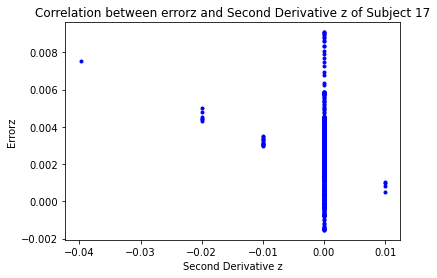

[[ 1.         -0.14564425]
 [-0.14564425  1.        ]]


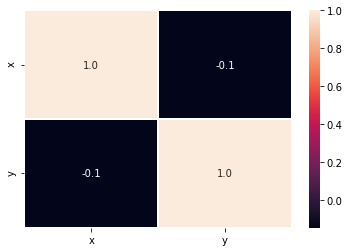

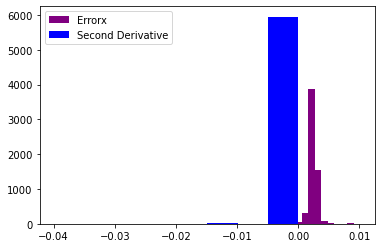

A média de erros é 0.002468542588172599


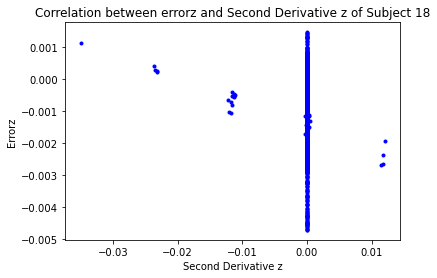

[[ 1.         -0.07683715]
 [-0.07683715  1.        ]]


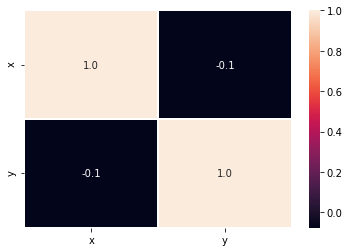

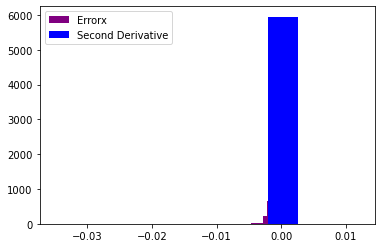

A média de erros é -0.0010476543552583682


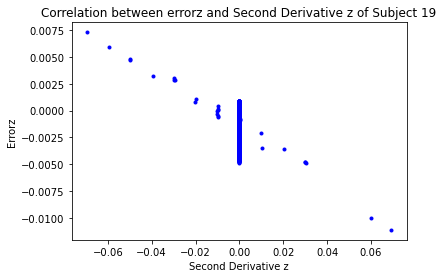

[[ 1.         -0.38344286]
 [-0.38344286  1.        ]]


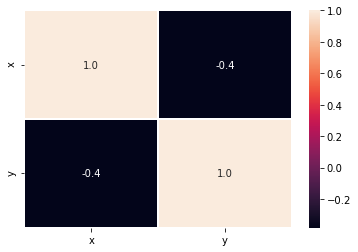

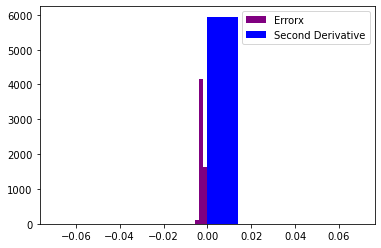

A média de erros é -0.0022515044493196393


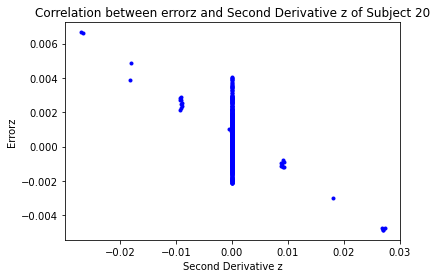

[[ 1.         -0.30352403]
 [-0.30352403  1.        ]]


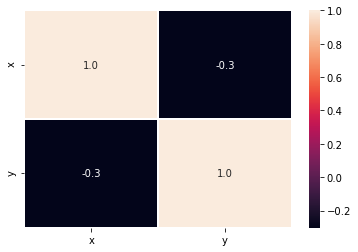

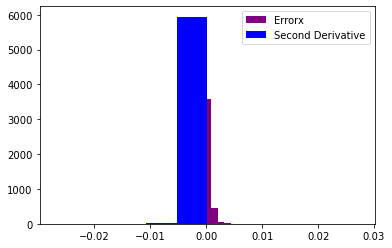

A média de erros é 5.3619653436236505e-05


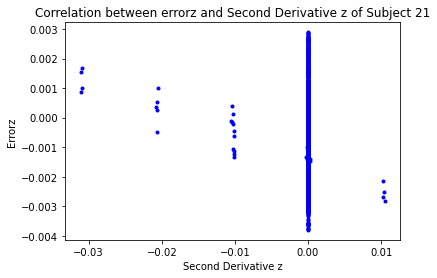

[[ 1.         -0.07257444]
 [-0.07257444  1.        ]]


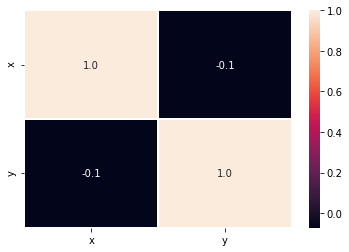

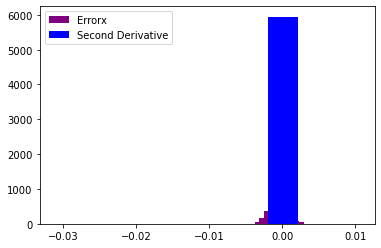

A média de erros é -0.0006974310150996449


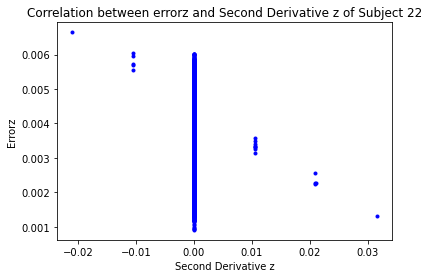

[[ 1.         -0.07711146]
 [-0.07711146  1.        ]]


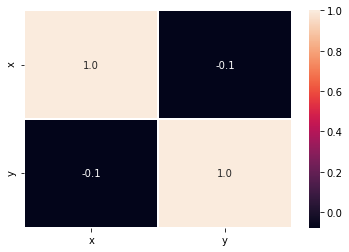

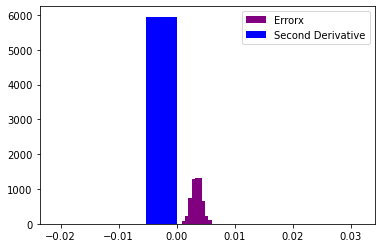

A média de erros é 0.003483201352215529


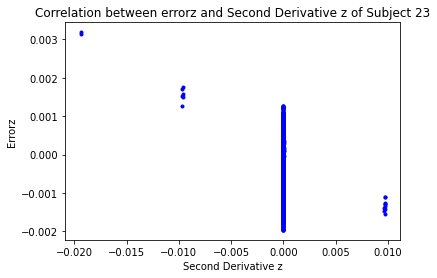

[[ 1.         -0.18965687]
 [-0.18965687  1.        ]]


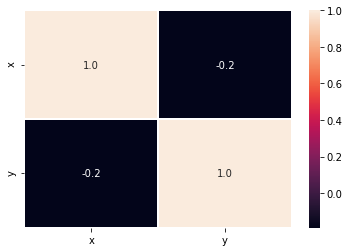

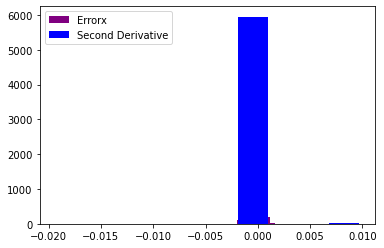

A média de erros é -0.00031721374400483024


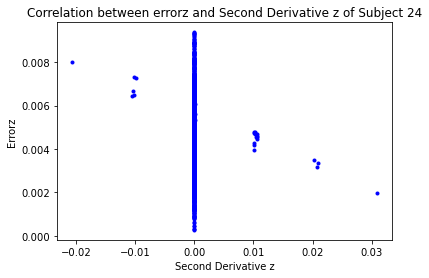

[[ 1.         -0.05928375]
 [-0.05928375  1.        ]]


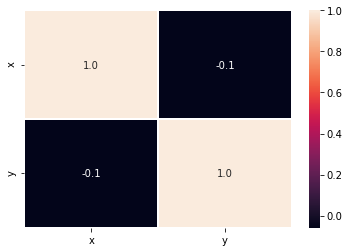

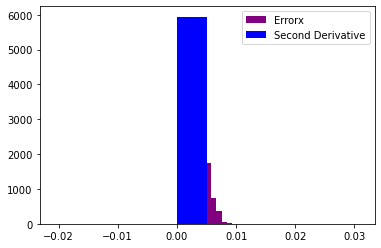

A média de erros é 0.0048079097350656975


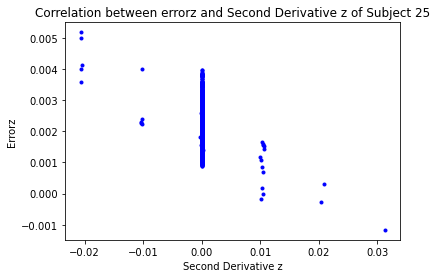

[[ 1.         -0.21172368]
 [-0.21172368  1.        ]]


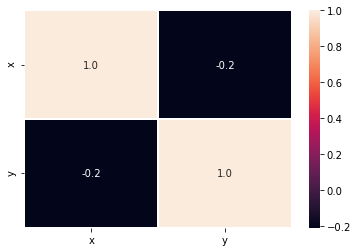

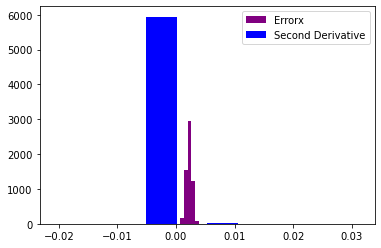

A média de erros é 0.0022740972024253214


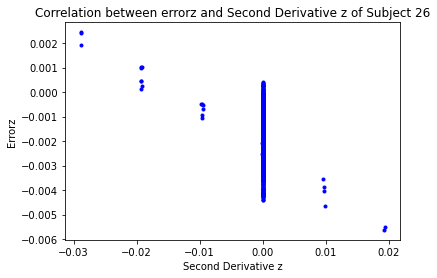

[[ 1.         -0.24793899]
 [-0.24793899  1.        ]]


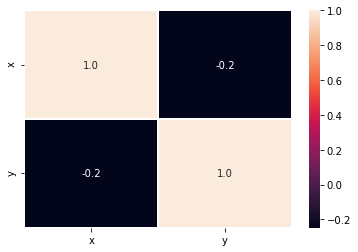

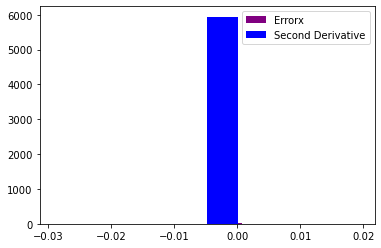

A média de erros é -0.0019603690377657692


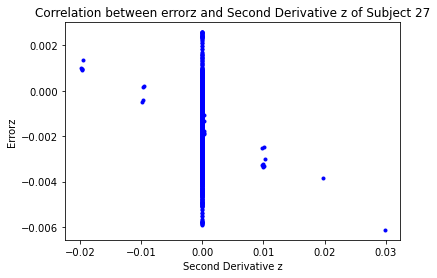

[[ 1.         -0.11963627]
 [-0.11963627  1.        ]]


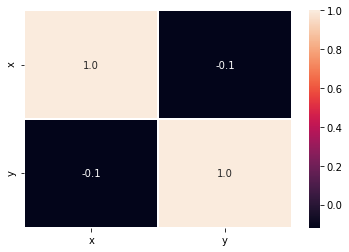

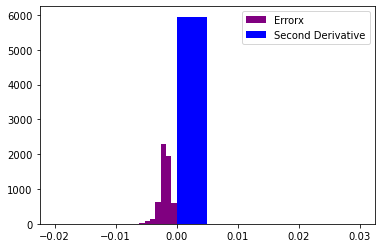

A média de erros é -0.0017954820014506251


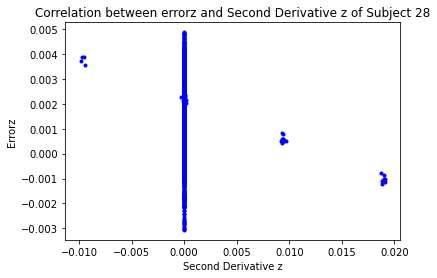

[[ 1.         -0.09005772]
 [-0.09005772  1.        ]]


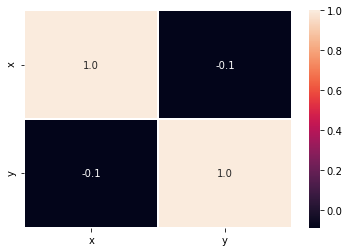

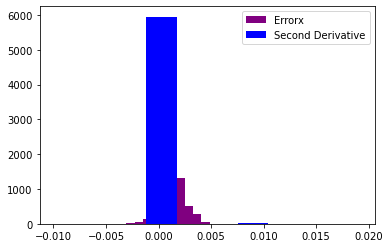

A média de erros é 0.001312252638526797


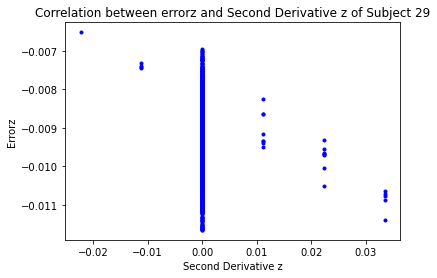

[[ 1.         -0.08018004]
 [-0.08018004  1.        ]]


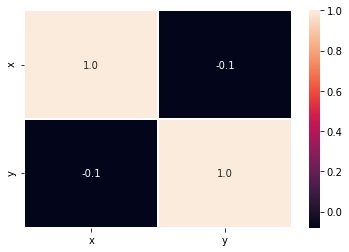

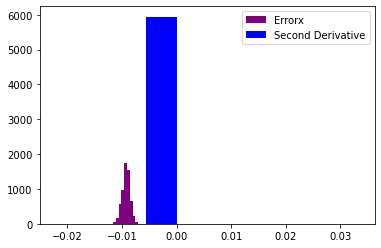

A média de erros é -0.00926509909127329


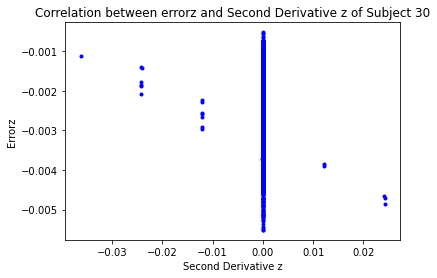

[[ 1.         -0.09165696]
 [-0.09165696  1.        ]]


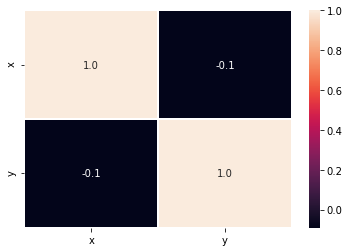

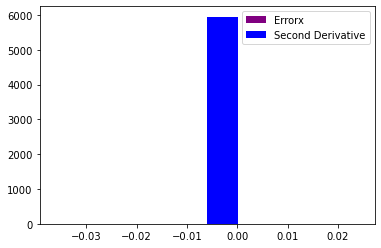

A média de erros é -0.002856002599926907


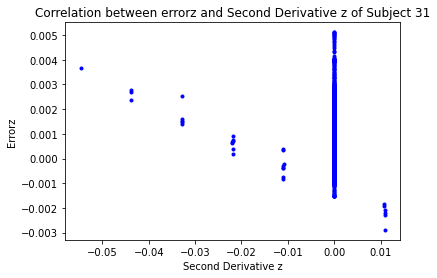

[[ 1.         -0.06150264]
 [-0.06150264  1.        ]]


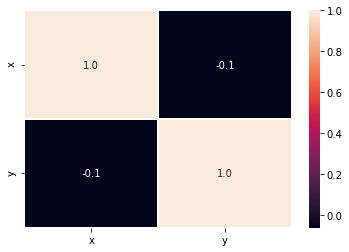

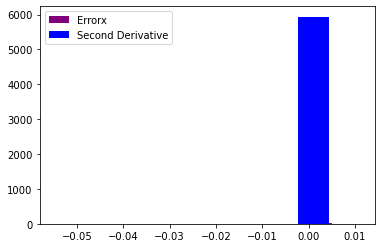

A média de erros é 0.0009090272467686463


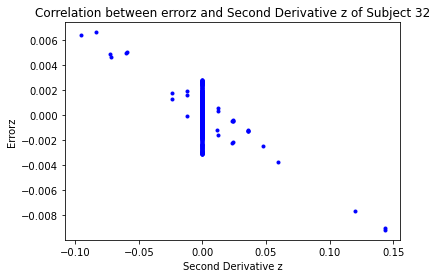

[[ 1.         -0.37590749]
 [-0.37590749  1.        ]]


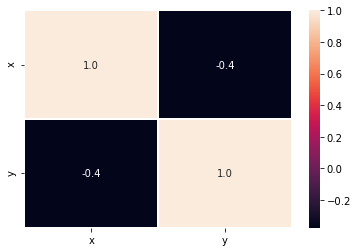

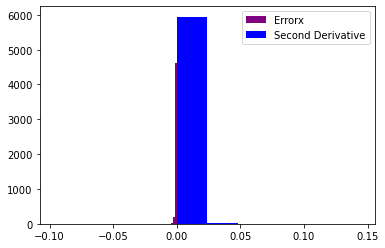

A média de erros é -0.00017274897780544566


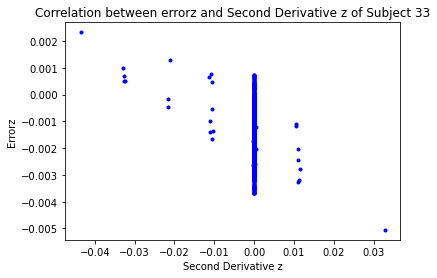

[[ 1.         -0.16887052]
 [-0.16887052  1.        ]]


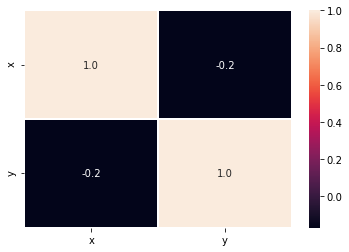

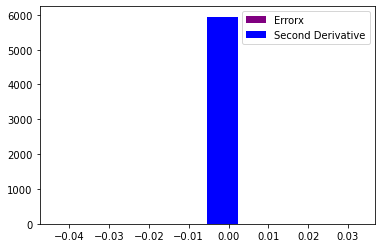

A média de erros é -0.0016725032532885545


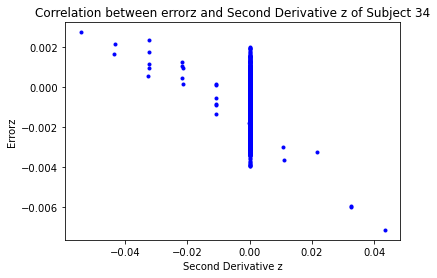

[[ 1.         -0.18632433]
 [-0.18632433  1.        ]]


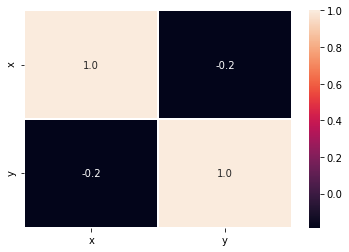

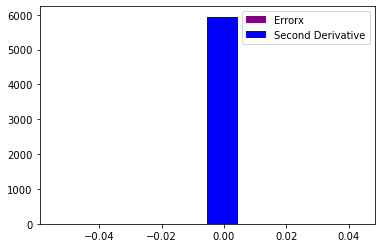

A média de erros é -0.0011118612316888094


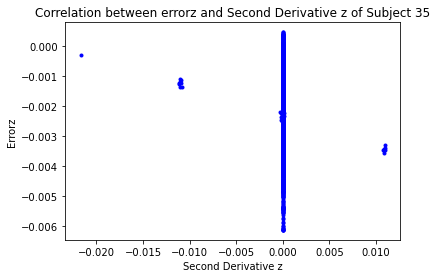

[[ 1.         -0.06881592]
 [-0.06881592  1.        ]]


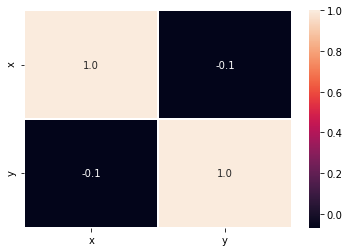

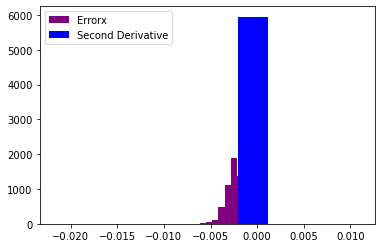

A média de erros é -0.0024117829126533543


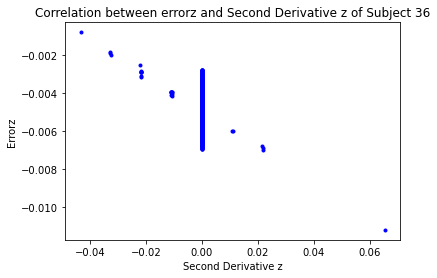

[[ 1.         -0.22780183]
 [-0.22780183  1.        ]]


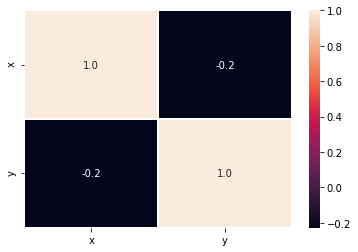

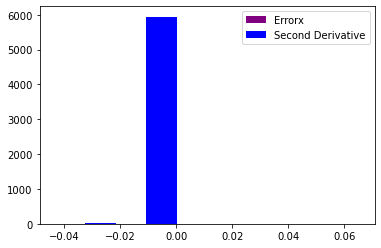

A média de erros é -0.004801374563299606


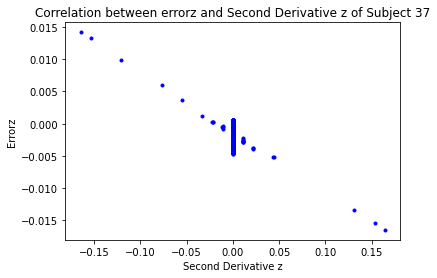

[[ 1.         -0.48540704]
 [-0.48540704  1.        ]]


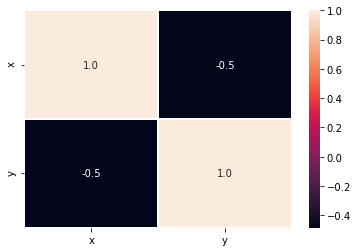

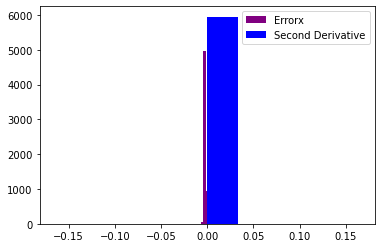

A média de erros é -0.0019476696421333144


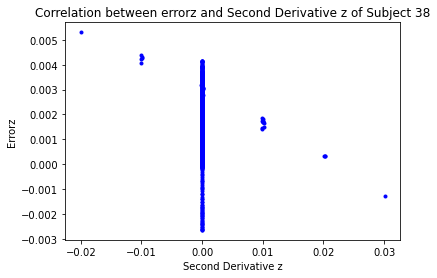

[[ 1.         -0.10802227]
 [-0.10802227  1.        ]]


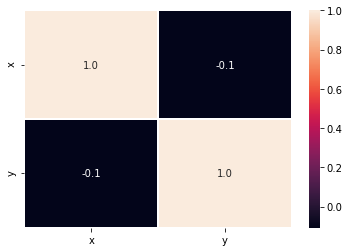

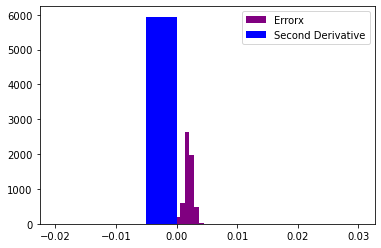

A média de erros é 0.0019774153558918105


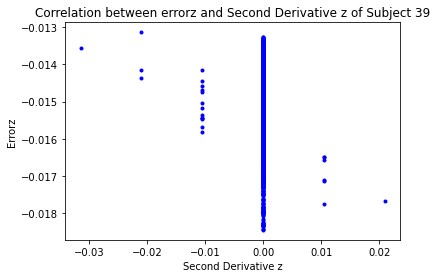

[[ 1.        -0.0828969]
 [-0.0828969  1.       ]]


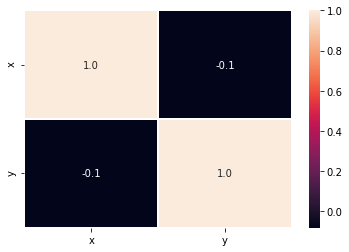

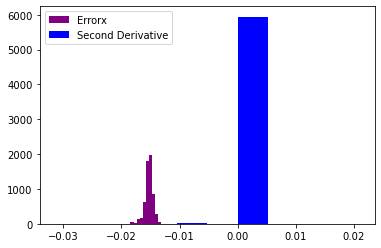

A média de erros é -0.015259474496516504


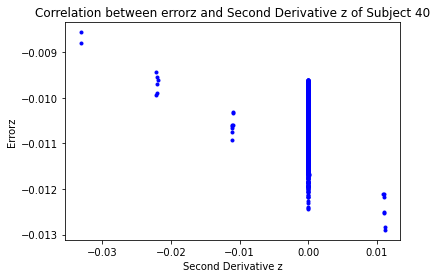

[[ 1.         -0.15654001]
 [-0.15654001  1.        ]]


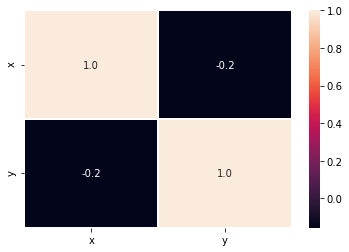

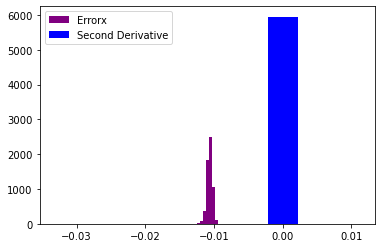

A média de erros é -0.010631403422549094


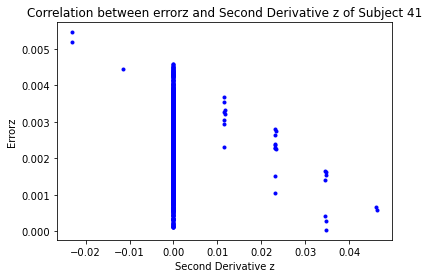

[[ 1.         -0.08878942]
 [-0.08878942  1.        ]]


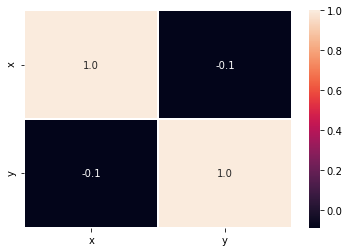

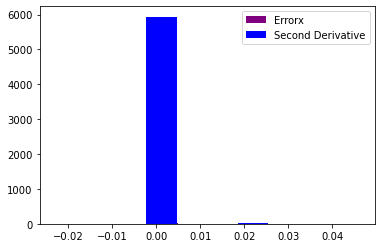

A média de erros é 0.002458850169466991


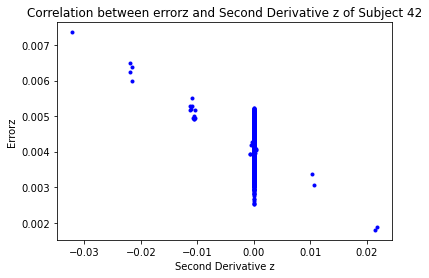

[[ 1.         -0.26614169]
 [-0.26614169  1.        ]]


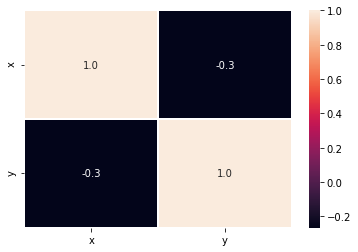

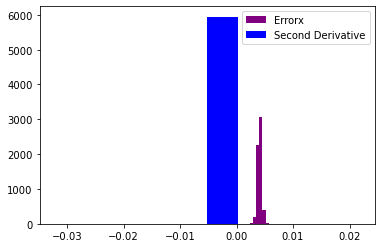

A média de erros é 0.004091423382018273


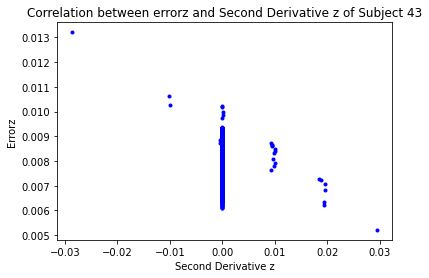

[[ 1.         -0.10000327]
 [-0.10000327  1.        ]]


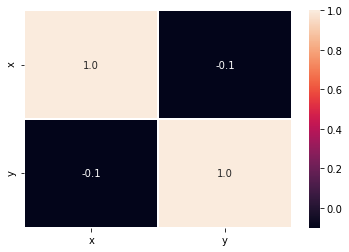

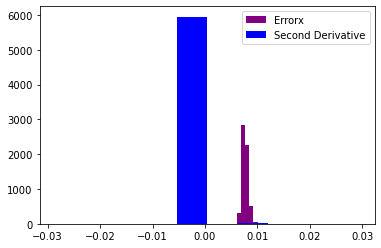

A média de erros é 0.007649576754530139


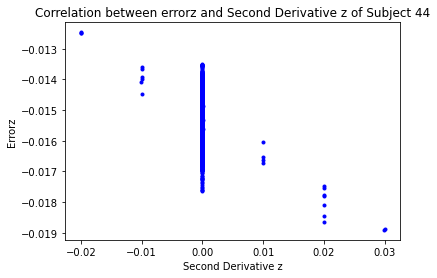

[[ 1.         -0.24901962]
 [-0.24901962  1.        ]]


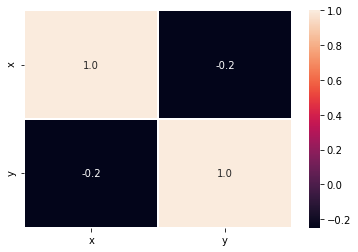

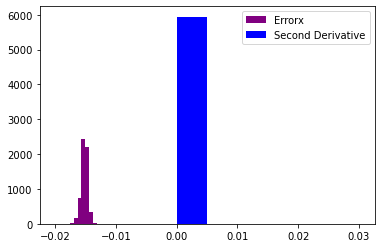

A média de erros é -0.015163915778901211


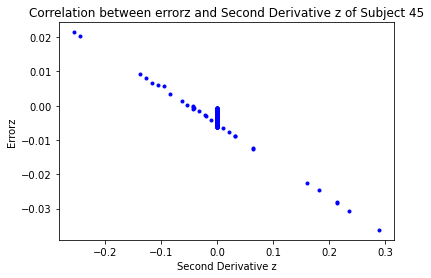

[[ 1.         -0.86745102]
 [-0.86745102  1.        ]]


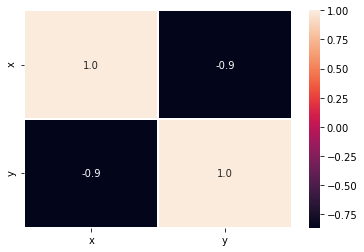

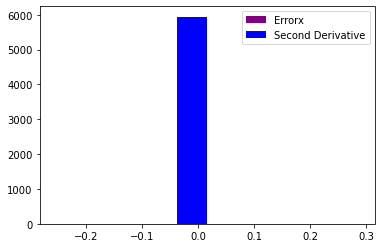

A média de erros é -0.003850358757093523


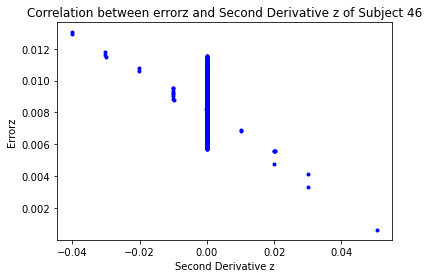

[[ 1.         -0.22142359]
 [-0.22142359  1.        ]]


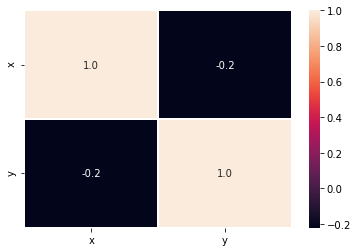

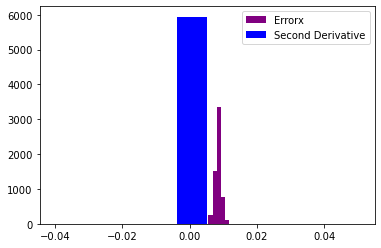

A média de erros é 0.008474062243882025


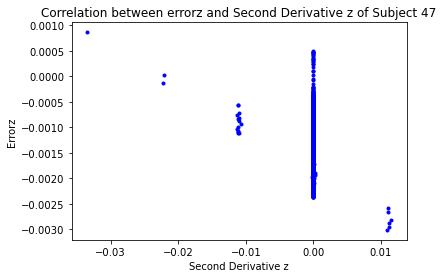

[[ 1.         -0.16762527]
 [-0.16762527  1.        ]]


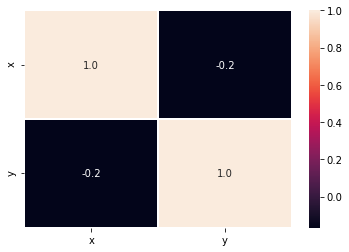

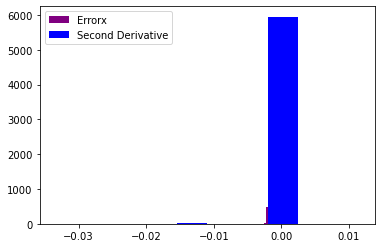

A média de erros é -0.0014042386557129127


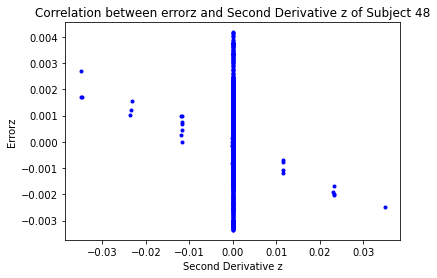

[[ 1.         -0.10169965]
 [-0.10169965  1.        ]]


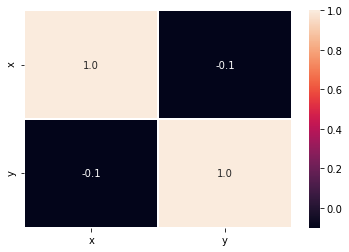

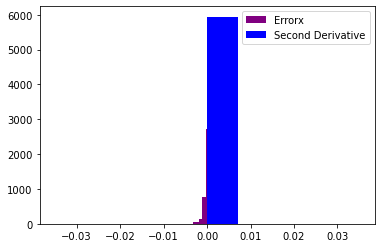

A média de erros é 0.00019817602157060817


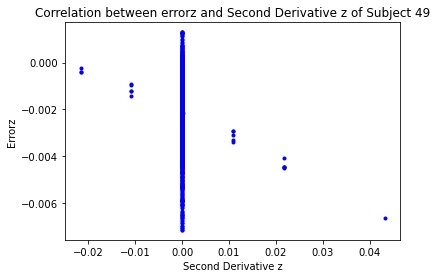

[[ 1.         -0.11238164]
 [-0.11238164  1.        ]]


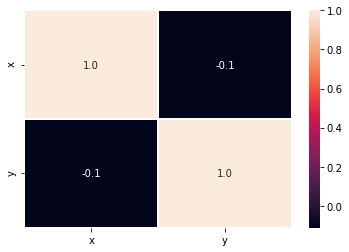

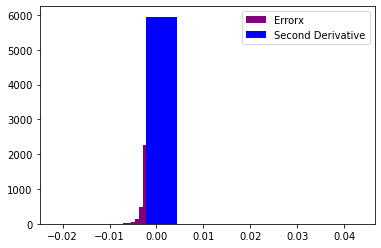

A média de erros é -0.0020871621728811634


In [18]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2z,
         'y': errorz
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Second Derivative z")
    plt.ylabel("Errorz")
    plt.title("Correlation between errorz and Second Derivative z of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d2z,errorz)
    print(r)
    plt.figure()
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()
    
    #histogramas
    plt.figure()
    hist=plt.hist(errorz,color='purple',label="Errorx")
    hist2=plt.hist(d2z, color='blue',label="Second Derivative")
    plt.legend()
    plt.show()
    mediaerro=(np.sum(errorz))/(len(errorz))
    mediad2x=(np.sum(d2z))/(len(d2z))
    print("A média de erros é {}".format(mediaerro))

In [16]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    mediaerro=(np.sum(errorz))/(len(errorz))
    mediad2z=(np.sum(d2z))/(len(d2z))
    print("A média de erros de {} é {}".format(s,mediaerro))
    print("A média da segunda derivada de {} é {}".format(s,mediad2z))
    varx=[]
    for i in range(0,len(d2z)):
        varx.append((d2z[i]-mediad2z)**2)
    varx2=(np.sum(varx))/(len(d2z))
    dpx=varx2**0.5
    vary=[]
    for u in range(0,len(errorz)):
        vary.append((errorz[u]-mediaerro)**2)
    vary2=(np.sum(vary))/(len(errorz))
    dpy=vary2**0.5
    print("O desvio padrão do erro de {} é {}".format(s,dpx))
    print("O desvio padrão da segunda derivada de {} é {}".format(s,dpy))

A média de erros de 1 é -0.006894928918740204
A média da segunda derivada de 1 é -2.9970532488865606e-05
O desvio padrão do erro de 1 é 0.0010632736476765305
O desvio padrão da segunda derivada de 1 é 0.0008867865750134703
A média de erros de 2 é -0.00231390774670916
A média da segunda derivada de 2 é -3.982035168655389e-05
O desvio padrão do erro de 2 é 0.000995749014988681
O desvio padrão da segunda derivada de 2 é 0.0009795622423632664
A média de erros de 3 é -0.0037118016774054336
A média da segunda derivada de 3 é 1.0854597505352033e-08
O desvio padrão do erro de 3 é 0.0007949456292620517
O desvio padrão da segunda derivada de 3 é 0.0008782590509064642
A média de erros de 4 é -0.0014290043885836915
A média da segunda derivada de 4 é 8.024222634486008e-06
O desvio padrão do erro de 4 é 0.0005959091902042738
O desvio padrão da segunda derivada de 4 é 0.0005807178581134242
A média de erros de 5 é -0.005411882354216867
A média da segunda derivada de 5 é -6.10507530419818e-05
O desvio 